In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

df_anno = pd.read_feather("./NHP_BG_AIT_115/204_346/anno.feather")   # Has subclass colors
#df_anno = pd.read_csv("./NHP_BG_AIT_115/204_337/NHP_BG_204_337_AIT115_ann_map_QC_full.csv")

In [2]:
df_anno.columns

Index(['sample_name_old', 'exp_component_name_id', 'exp_component_name_label',
       'exp_component_name_color', 'exp_component_vendor_name_id',
       'exp_component_vendor_name_label', 'exp_component_vendor_name_color',
       'batch_id', 'batch_label', 'batch_color',
       ...
       'contaminationType_label', 'contaminationType_color', 'contam_sum_id',
       'contam_sum_label', 'contam_sum_color', 'ar_id', 'reference_id',
       'cell_id', 'sample_id', 'cluster'],
      dtype='object', length=507)

In [3]:
df_ephys = pd.read_csv("NHPephys_features_090523.csv")
df_ephys.columns

Index(['cell_name', 'blowout_mv_qc', 'electrode_0_pa_qc', 'recording_date_qc',
       'seal_gohm_qc', 'input_resistance_mohm_qc',
       'initial_access_resistance_mohm_qc', 'input_access_resistance_ratio_qc',
       'fail_tags_qc', 'failed_blowout',
       ...
       'first_isi_inv_hero', 'peak_ratio_chirp', 'peak_freq_chirp',
       '3db_freq_chirp', 'peak_impedance_chirp', 'low_freq_impedance_chirp',
       'sync_freq_chirp', 'phase_peak_chirp', 'phase_low_chirp',
       'total_inductive_phase_chirp'],
      dtype='object', length=111)

In [4]:
df_ephys['recording_date_qc'].sort_values()

624     2019-10-10 23:56:30
1258    2019-10-22 21:16:40
784     2019-10-22 21:51:42
359     2019-10-22 22:54:15
476     2019-10-22 23:43:19
               ...         
600     2023-08-16 21:58:56
697     2023-08-16 22:16:10
985     2023-08-16 22:27:28
157     2023-08-16 23:01:08
957     2023-08-16 23:19:56
Name: recording_date_qc, Length: 1884, dtype: object

In [5]:
df_id = pd.read_csv("custom_report.csv")

In [6]:
print('Cultured: ', sum(df_id['project ']=='qIVSCC-METc'))
print('Acute: ', sum(df_id['project ']=='qIVSCC-METa'))

Cultured:  686
Acute:  1304


In [7]:
df2 = pd.merge(df_anno, df_id, how='inner', left_on='cell_name_label', right_on='cell_specimen_name ', sort=True)

len(df2)

1372

In [8]:
len(df_anno)

2360

In [9]:
len(df_id)

1990

In [10]:
df3 = pd.merge(df2, df_ephys, how='inner', left_on='cell_specimen_id ', right_on='cell_name', sort=True)
len(df3)

1368

In [11]:
df3_filt = df3[['STR' in roi for roi in df3['roi_label']]]
#inds1 = ifelse(grepl("STR|PALGPi|HYSTN",annoNew$roi), TRUE,FALSE)

df3_filt = df3_filt[df3_filt['percent_reads_aligned_total_label']>=25]    # was 50%
print(len(df3_filt))
df3_filt = df3_filt[df3_filt['Genes.Detected_label']>=1000]
print(len(df3_filt))
#df3_filt = df3_filt[df3_filt['score.Corr']>=0.55]
df3_filt = df3_filt[df3_filt['marker_sum_norm_label'] >= 0.6]
print(len(df3_filt))
#df3_filt = df3_filt[df3_filt['rna_amplification_pass_fail_label']=='Pass']
print(len(df3_filt))
# Layer labels have no numerics, no need to filter

952
821
665
665


<Figure size 1440x2880 with 0 Axes>

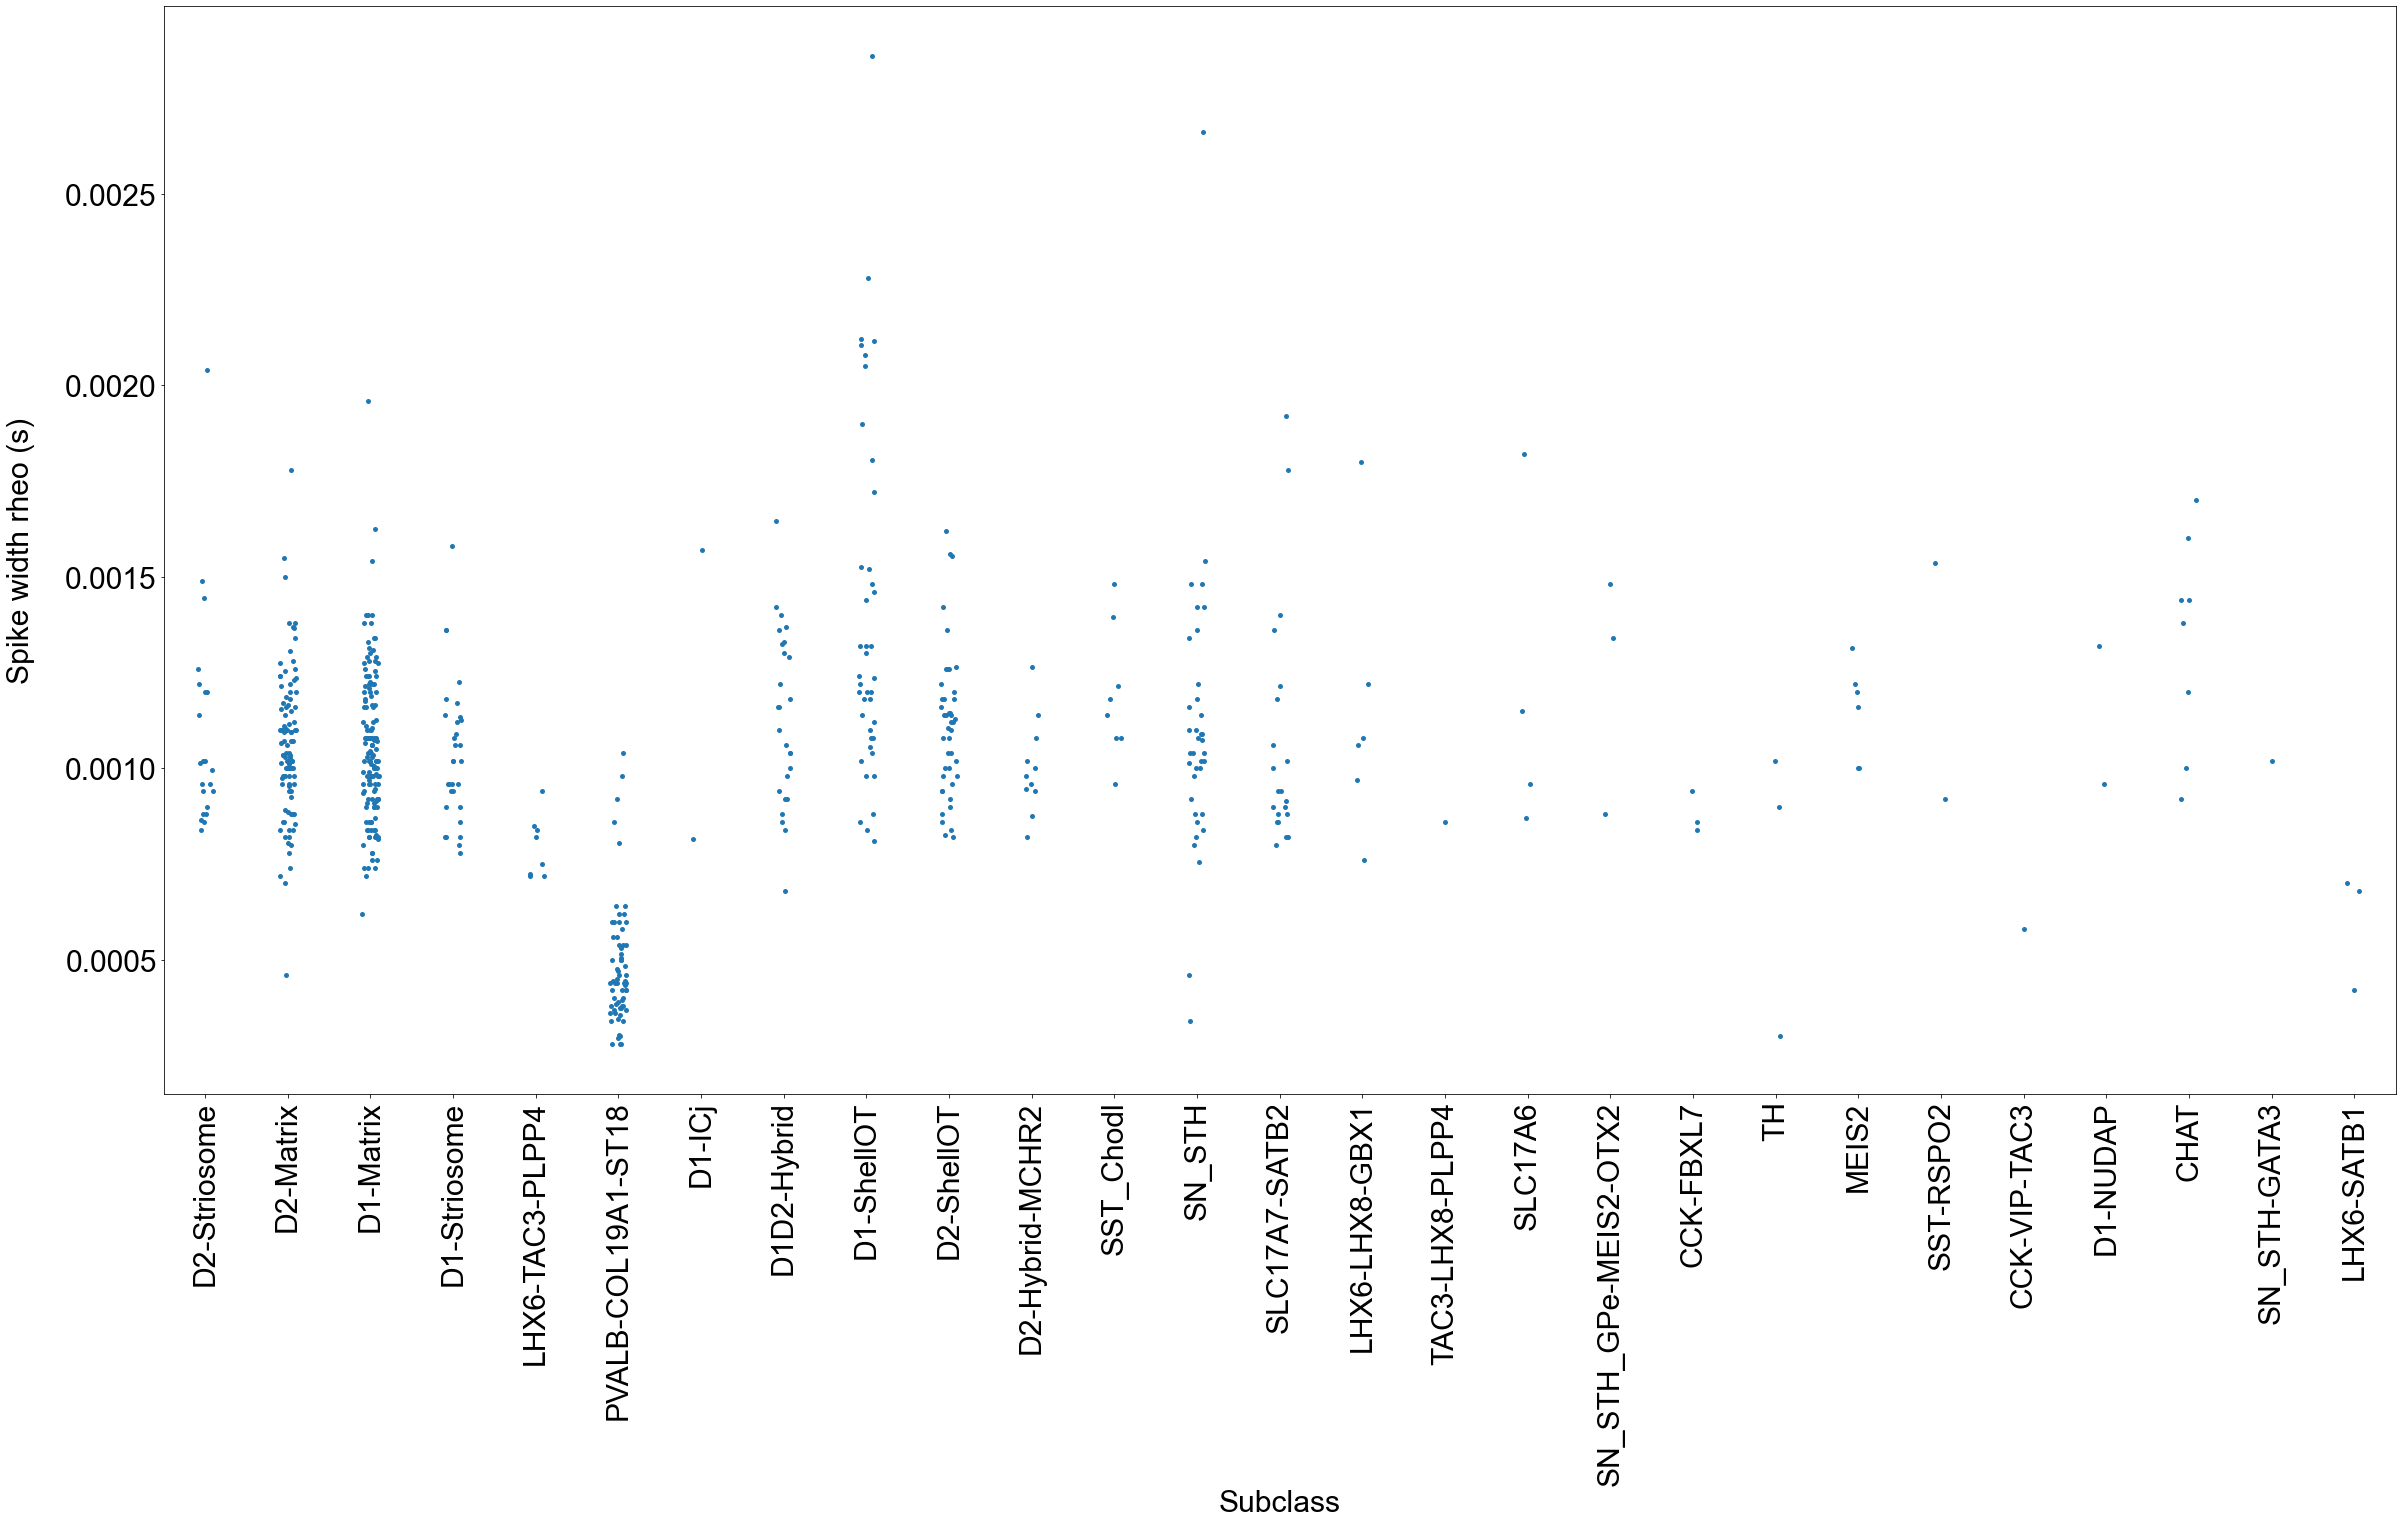

<Figure size 1440x2880 with 0 Axes>

In [12]:
fig, ax1 = plt.subplots(figsize=(40,20))
sns.set(rc={'figure.figsize':(20,40)})
sns.stripplot(data=df3_filt, x="level3.subclass_Tree_label", y="width_rheo", ax = ax1)
ax1.set_xlabel('Subclass', fontsize = 30)
ax1.set_ylabel('Spike width rheo (s)', labelpad=30, fontsize = 30)
#sns.catplot(data=df3, x="level3.subclass_Corr", y="fast_trough_v_rheo")
#sns.catplot(data=df3, x="level3.subclass_Corr", y="fast_trough_v_rheo")
#sns.catplot(data=df3, x="level3.subclass_Corr", y="latency_rheo")
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.figure(figsize=(20, 40))

In [13]:
main_subclasses = ['D1-Matrix', 'D2-Matrix', 'D1-Striosome', 'D2-Striosome', 'D1-ShellOT', 'D2-ShellOT', 
                   'D1D2-Hybrid', 'D2-Hybrid-MCHR2', 'D1-NUDAP',
                   'SST_Chodl', 'PVALB-COL19A1-ST18', 'CHAT', 'LHX6-TAC3-PLPP4', 'TAC3-LHX8-PLPP4', 
                   'CCK-VIP-TAC3', 'CCK-FBXL7']
df3_filt_sub = df3_filt[[sc in main_subclasses for sc in df3_filt['level3.subclass_Tree_label']]]
df3_filt_sub.reset_index(inplace=True, drop=True)   # Important to reset index for subsequent steps
df3_filt_sub

,sample_name_old,exp_component_name_id,exp_component_name_label,exp_component_name_color,exp_component_vendor_name_id,exp_component_vendor_name_label,exp_component_vendor_name_color,batch_id,batch_label,batch_color,...,first_isi_inv_hero,peak_ratio_chirp,peak_freq_chirp,3db_freq_chirp,peak_impedance_chirp,low_freq_impedance_chirp,sync_freq_chirp,phase_peak_chirp,phase_low_chirp,total_inductive_phase_chirp
0,None,2195,SM-J39WG_S281_E1-50,#CC1F68,2195,SM-J39WG-S281,#CC1F68,11,R8S4-191030,#CCA21F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,2180,SM-J39VK_S075_E1-50,#CC005E,2180,SM-J39VK-S075,#CC005E,12,R8S4-191120,#998000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,2181,SM-J39VK_S076_E1-50,#99456B,2181,SM-J39VK-S076,#99456B,12,R8S4-191120,#998000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,2182,SM-J39VK_S077_E1-50,#FF4D9E,2182,SM-J39VK-S077,#FF4D9E,12,R8S4-191120,#998000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,2183,SM-J39VK_S078_E1-50,#CC1F6D,2183,SM-J39VK-S078,#CC1F6D,12,R8S4-191120,#998000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,None,1594,AB-S40343_S761_E1-50,#554DFF,1594,AB-S40343_S761_E1-50,#554DFF,77,R8S4-230919,#CC5C75,...,10.162602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,None,1599,AB-S40343_S766_E1-50,#1F1799,1599,AB-S40343_S766_E1-50,#1F1799,77,R8S4-230919,#CC5C75,...,4.921260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,None,1595,AB-S40343_S762_E1-50,#281FCC,1595,AB-S40343_S762_E1-50,#281FCC,77,R8S4-230919,#CC5C75,...,11.228385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,None,1596,AB-S40343_S763_E1-50,#080099,1596,AB-S40343_S763_E1-50,#080099,77,R8S4-230919,#CC5C75,...,10.886131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(len(df3_filt_sub.columns))
print(len(df3_filt_sub.columns) - 92)
print(df3_filt_sub.columns.get_loc('upstroke_downstroke_ratio_ramp'))

686
594
594


In [15]:
df_ephys_sub = df3_filt_sub.iloc[:,594:686]
print(len(df_ephys_sub.columns))
df_ephys_sub.columns

92


Index(['upstroke_downstroke_ratio_ramp', 'threshold_v_ramp', 'width_ramp',
       'upstroke_ramp', 'downstroke_ramp', 'width_suprathresh_ramp',
       'trough_v_ramp', 'threshold_i_ramp', 'postap_slope_ramp',
       'fast_trough_deltav_ramp', 'peak_deltav_ramp',
       'upstroke_downstroke_ratio_short_square', 'threshold_v_short_square',
       'width_short_square', 'upstroke_short_square',
       'downstroke_short_square', 'width_suprathresh_short_square',
       'peak_deltav_short_square', 'sag', 'sag_area', 'sag_tau', 'v_baseline',
       'rheobase_i', 'fi_fit_slope', 'vm_for_sag', 'input_resistance',
       'input_resistance_ss', 'tau', 'latency_rheo', 'avg_rate_rheo',
       'mean_isi_rheo', 'upstroke_downstroke_ratio_rheo', 'threshold_v_rheo',
       'peak_v_rheo', 'width_rheo', 'upstroke_rheo', 'downstroke_rheo',
       'width_suprathresh_rheo', 'trough_v_rheo', 'fast_trough_v_rheo',
       'postap_slope_rheo', 'fast_trough_v_last_rheo', 'adp_v_last_rheo',
       'adapt_hero', '

In [67]:
# Conservative outlier removal via std after transform
# Compare within each subclass and feature separately

from scipy.stats import skew
if 'PV' in df_ephys_sub.columns:
    df_ephys_sub = df_ephys_sub.drop(['PV'], axis=1)

keep = set(np.arange(len(df_ephys_sub)))
feat_outliers = []
df_ephys_sub_no_outliers = df_ephys_sub.copy()
df_ephys_trans = df3_filt_sub.copy()

for feat in df_ephys_sub.columns:  
    print(feat)
    sk = skew(df_ephys_sub[feat], nan_policy = 'omit')
    if sk > 5:     # If very right skewed, log transform
        print('skewed')
        if any(df_ephys_sub[feat] == 0):
            #min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
            A = np.array(df_ephys_sub[feat][df_ephys_sub[feat]!=0])
            k = 3
            idx = np.argpartition(A, k)
            print("mins:", A[idx[:k]])
            print("mean:", np.nanmean(A))
            min_nonzero = np.mean(A[idx[:k]])
            print(min_nonzero)
            feat_vals = np.log(df_ephys_sub[feat]+min_nonzero)     # Careful creates a histogram bump at 0
        else:
            feat_vals = np.log(df_ephys_sub[feat])     
        # Be careful whether you want to add 0, but it's largely not counts, so not often zero?
    else:
        print('not_skewed')
        feat_vals = df_ephys_sub[feat]
        
    df_ephys_trans[feat] = feat_vals
    outlier_temp = np.empty(shape=(0))
    for subclass in main_subclasses:
        feat_vals_sub = feat_vals[df3_filt_sub['level3.subclass_Tree_label']==subclass]
        #Q1 = np.nanpercentile(feat_vals_sub, 25)
        #Q3 = np.nanpercentile(feat_vals_sub, 75)
        #IQR = Q3 - Q1
        feat_vals_z = (feat_vals-np.nanmean(feat_vals_sub))/np.nanstd(feat_vals_sub)
        
        thresh = 3.5
        # Above Upper bound
        upper = thresh
        #upper=Q3+thresh*IQR
        nz_inds_upper = np.nonzero(np.array(feat_vals_z>upper) & np.array(df3_filt_sub['level3.subclass_Tree_label']==subclass))
         
        #Below Lower bound
        lower = -thresh
        #lower=Q1-thresh*IQR
        nz_inds_lower = np.nonzero(np.array(feat_vals_z<lower) & np.array(df3_filt_sub['level3.subclass_Tree_label']==subclass))
        
        #print('thresh:', thresh)
        print(subclass)
        print(upper)
        print(lower)
        print(len(nz_inds_upper[0]))
        print(len(nz_inds_lower[0]))
        print(np.count_nonzero(~np.isnan(feat_vals_sub)))
        #print(0.005 * len(feat_vals))
        #print('IQR:', IQR)
        
        if len(nz_inds_upper[0]) != 0:
            print("Severe high outlier(s) for feature ", feat)
            print(feat_vals.iloc[nz_inds_upper[0]])
            print(nz_inds_upper)
        if len(nz_inds_lower[0]) != 0:
            print("Severe low outlier(s) for feature ", feat)
            print(feat_vals.iloc[nz_inds_lower[0]])

        keep = keep.difference(set(nz_inds_upper[0]))
        keep = keep.difference(set(nz_inds_lower[0]))
        #outlier_temp = outlier_temp.append(nz_inds_upper[0])
        #outlier_temp = outlier_temp.append(nz_inds_lower[0])
        outlier_temp = np.hstack((outlier_temp,nz_inds_upper[0],nz_inds_lower[0]))
        #list(np.hstack((nz_inds_upper[0], nz_inds_lower[0])))
    outlier_temp = np.unique(outlier_temp).astype(int)
    feat_outliers.append(outlier_temp)
    print(outlier_temp)
    df_ephys_sub_no_outliers[feat].iloc[outlier_temp] = np.nan
    df_ephys_trans[feat].iloc[outlier_temp] = np.nan
    #keep.remove(lower_array)
    
print(keep)
print(len(list(keep)))


upstroke_downstroke_ratio_ramp
not_skewed
D1-Matrix
3.5
-3.5
1
0
94
Severe high outlier(s) for feature  upstroke_downstroke_ratio_ramp
86    7.716275
Name: upstroke_downstroke_ratio_ramp, dtype: float64
(array([86]),)
D2-Matrix
3.5
-3.5
0
0
81
D1-Striosome
3.5
-3.5
0
0
21
D2-Striosome
3.5
-3.5
0
0
16
D1-ShellOT
3.5
-3.5
0
0
24
D2-ShellOT
3.5
-3.5
0
0
24
D1D2-Hybrid
3.5
-3.5
0
0
17
D2-Hybrid-MCHR2
3.5
-3.5
0
0
8
D1-NUDAP
3.5
-3.5
0
0
1
SST_Chodl
3.5
-3.5
0
0
4
PVALB-COL19A1-ST18
3.5
-3.5
1
0
54
Severe high outlier(s) for feature  upstroke_downstroke_ratio_ramp
403    4.704092
Name: upstroke_downstroke_ratio_ramp, dtype: float64
(array([403]),)
CHAT
3.5
-3.5
0
0
1
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
4
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0
1
CCK-FBXL7
3.5
-3.5
0
0
2
[ 86 403]
threshold_v_ramp
not_skewed
D1-Matrix
3.5
-3.5
0
1
94
Severe low outlier(s) for feature  threshold_v_ramp
223   -120.104169
Name: threshold_v_ramp, dtype: float64
D2-Matrix
3.5
-3.5
0
1
81
Severe low outl

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/915137741.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ephys_trans[feat].iloc[outlier_temp] = np.nan


D1-Matrix
3.5
-3.5
0
0
141
D2-Matrix
3.5
-3.5
0
1
97
Severe low outlier(s) for feature  peak_deltav_short_square
490    41.781254
Name: peak_deltav_short_square, dtype: float64
D1-Striosome
3.5
-3.5
0
1
31
Severe low outlier(s) for feature  peak_deltav_short_square
164    32.125
Name: peak_deltav_short_square, dtype: float64
D2-Striosome
3.5
-3.5
0
0
22
D1-ShellOT
3.5
-3.5
0
0
39
D2-ShellOT
3.5
-3.5
0
0
43
D1D2-Hybrid
3.5
-3.5
0
0
26
D2-Hybrid-MCHR2
3.5
-3.5
0
0
10
D1-NUDAP
3.5
-3.5
0
0
2
SST_Chodl
3.5
-3.5
0
0
5
PVALB-COL19A1-ST18
3.5
-3.5
0
1
66
Severe low outlier(s) for feature  peak_deltav_short_square
142    12.53125
Name: peak_deltav_short_square, dtype: float64
CHAT
3.5
-3.5
0
0
5
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
8
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0
1
CCK-FBXL7
3.5
-3.5
0
0
3
[142 164 490]
sag
not_skewed
D1-Matrix
3.5
-3.5
2
0
147
Severe high outlier(s) for feature  sag
216    0.542180
243    0.481985
Name: sag, dtype: float64
(array([216, 243]),)
D2-Matrix
3.5

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/915137741.py:42: RuntimeWarning: Mean of empty slice
  feat_vals_z = (feat_vals-np.nanmean(feat_vals_sub))/np.nanstd(feat_vals_sub)
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


D1-Matrix
3.5
-3.5
0
0
147
D2-Matrix
3.5
-3.5
0
0
105
D1-Striosome
3.5
-3.5
0
0
31
D2-Striosome
3.5
-3.5
0
0
22
D1-ShellOT
3.5
-3.5
0
0
41
D2-ShellOT
3.5
-3.5
0
0
44
D1D2-Hybrid
3.5
-3.5
0
0
26
D2-Hybrid-MCHR2
3.5
-3.5
0
0
11
D1-NUDAP
3.5
-3.5
0
0
2
SST_Chodl
3.5
-3.5
0
0
8
PVALB-COL19A1-ST18
3.5
-3.5
0
0
67
CHAT
3.5
-3.5
0
0
8
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
8
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0
1
CCK-FBXL7
3.5
-3.5
0
0
3
[]
downstroke_rheo
not_skewed
D1-Matrix
3.5
-3.5
0
0
147
D2-Matrix
3.5
-3.5
0
1
105
Severe low outlier(s) for feature  downstroke_rheo
404   -212.353783
Name: downstroke_rheo, dtype: float64
D1-Striosome
3.5
-3.5
0
0
31
D2-Striosome
3.5
-3.5
0
0
22
D1-ShellOT
3.5
-3.5
0
0
41
D2-ShellOT
3.5
-3.5
0
0
44
D1D2-Hybrid
3.5
-3.5
0
0
26
D2-Hybrid-MCHR2
3.5
-3.5
0
0
11
D1-NUDAP
3.5
-3.5
0
0
2
SST_Chodl
3.5
-3.5
0
0
8
PVALB-COL19A1-ST18
3.5
-3.5
0
0
67
CHAT
3.5
-3.5
0
0
8
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
8
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0


[302 403]
upstroke_hero
not_skewed
D1-Matrix
3.5
-3.5
0
0
147
D2-Matrix
3.5
-3.5
0
0
105
D1-Striosome
3.5
-3.5
0
0
31
D2-Striosome
3.5
-3.5
0
0
22
D1-ShellOT
3.5
-3.5
0
0
41
D2-ShellOT
3.5
-3.5
0
0
44
D1D2-Hybrid
3.5
-3.5
0
0
26
D2-Hybrid-MCHR2
3.5
-3.5
0
0
11
D1-NUDAP
3.5
-3.5
0
0
2
SST_Chodl
3.5
-3.5
0
0
8
PVALB-COL19A1-ST18
3.5
-3.5
0
0
67
CHAT
3.5
-3.5
0
0
8
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
8
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0
1
CCK-FBXL7
3.5
-3.5
0
0
3
[]
downstroke_hero
not_skewed
D1-Matrix
3.5
-3.5
0
0
147
D2-Matrix
3.5
-3.5
0
1
105
Severe low outlier(s) for feature  downstroke_hero
404   -215.897839
Name: downstroke_hero, dtype: float64
D1-Striosome
3.5
-3.5
0
0
31
D2-Striosome
3.5
-3.5
0
0
22
D1-ShellOT
3.5
-3.5
0
0
41
D2-ShellOT
3.5
-3.5
0
0
44
D1D2-Hybrid
3.5
-3.5
0
0
26
D2-Hybrid-MCHR2
3.5
-3.5
0
0
11
D1-NUDAP
3.5
-3.5
0
0
2
SST_Chodl
3.5
-3.5
0
0
8
PVALB-COL19A1-ST18
3.5
-3.5
0
0
67
CHAT
3.5
-3.5
0
0
8
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
8
TAC3-LHX8-PLPP4
3.5
-3

D1-NUDAP
3.5
-3.5
0
0
0
SST_Chodl
3.5
-3.5
0
0
6
PVALB-COL19A1-ST18
3.5
-3.5
0
1
65
Severe low outlier(s) for feature  downstroke_adapt_ratio
127    0.624376
Name: downstroke_adapt_ratio, dtype: float64
CHAT
3.5
-3.5
0
0
3
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
4
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0
1
CCK-FBXL7
3.5
-3.5
0
0
3
[107 118 127 202 305]
threshold_v_adapt_ratio
not_skewed
D1-Matrix
3.5
-3.5
0
2
139
Severe low outlier(s) for feature  threshold_v_adapt_ratio
285    0.76917
351    0.75764
Name: threshold_v_adapt_ratio, dtype: float64
D2-Matrix
3.5
-3.5
0
1
103
Severe low outlier(s) for feature  threshold_v_adapt_ratio
305    0.723552
Name: threshold_v_adapt_ratio, dtype: float64
D1-Striosome
3.5
-3.5
0
0
29
D2-Striosome
3.5
-3.5
0
1
22
Severe low outlier(s) for feature  threshold_v_adapt_ratio
107    0.812567
Name: threshold_v_adapt_ratio, dtype: float64
D1-ShellOT
3.5
-3.5
0
0
29
D2-ShellOT
3.5
-3.5
0
0
42
D1D2-Hybrid
3.5
-3.5
0
1
23
Severe low outlier(s) for feature 

D1-Matrix
3.5
-3.5
0
0
5
D2-Matrix
3.5
-3.5
0
0
7
D1-Striosome
3.5
-3.5
0
0
2
D2-Striosome
3.5
-3.5
0
0
1
D1-ShellOT
3.5
-3.5
0
0
4
D2-ShellOT
3.5
-3.5
0
0
3
D1D2-Hybrid
3.5
-3.5
0
0
1
D2-Hybrid-MCHR2
3.5
-3.5
0
0
0
D1-NUDAP
3.5
-3.5
0
0
0
SST_Chodl
3.5
-3.5
0
0
0
PVALB-COL19A1-ST18
3.5
-3.5
0
0
3
CHAT
3.5
-3.5
0
0
0
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
0
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
0
CCK-VIP-TAC3
3.5
-3.5
0
0
0
CCK-FBXL7
3.5
-3.5
0
0
0
[]
total_inductive_phase_chirp
not_skewed
D1-Matrix
3.5
-3.5
0
0
5
D2-Matrix
3.5
-3.5
0
0
7
D1-Striosome
3.5
-3.5
0
0
2
D2-Striosome
3.5
-3.5
0
0
1
D1-ShellOT
3.5
-3.5
0
0
4
D2-ShellOT
3.5
-3.5
0
0
3
D1D2-Hybrid
3.5
-3.5
0
0
1
D2-Hybrid-MCHR2
3.5
-3.5
0
0
0
D1-NUDAP
3.5
-3.5
0
0
0
SST_Chodl
3.5
-3.5
0
0
0
PVALB-COL19A1-ST18
3.5
-3.5
0
0
3
CHAT
3.5
-3.5
0
0
0
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
0
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
0
CCK-VIP-TAC3
3.5
-3.5
0
0
0
CCK-FBXL7
3.5
-3.5
0
0
0
[]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 

<Axes: xlabel='level3.subclass_Tree_label', ylabel='downstroke_ramp'>

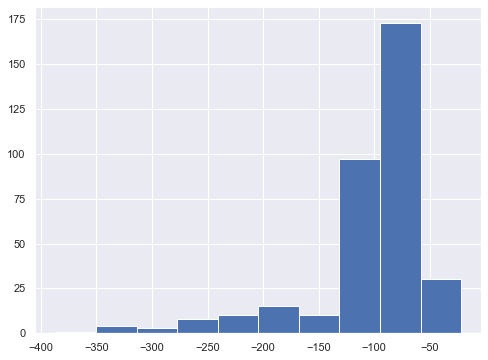

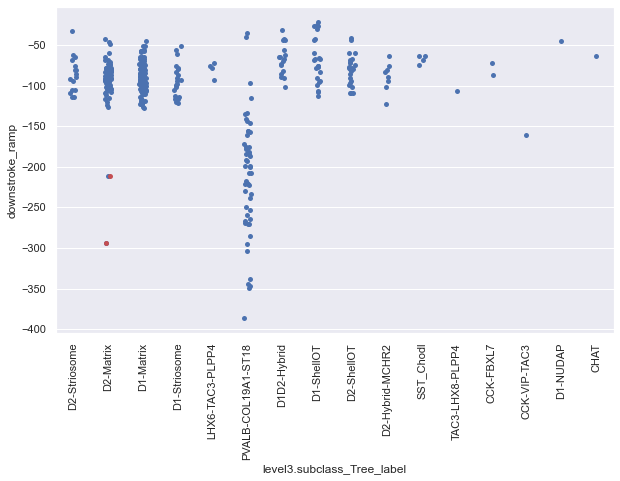

In [17]:
#feat = 'upstroke_downstroke_ratio_short_square'
#feat = 'total_inductive_phase_chirp'
#feat = 'phase_peak_chirp'
#feat = 'threshold_v_short_square'
#feat = 'width_ramp'
#feat = 'avg_rate_rheo'
feat = 'downstroke_ramp'

#(n, bins, patches) = plt.hist(df_ephys_sub[feat][df_ephys_sub[feat]<0.1], bins = 50)   # Needs log transform
#min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
#feat_vals = np.log(df_ephys_sub[feat]+min_nonzero) 
#plt.hist(feat_vals)
fig,ax = plt.subplots(figsize=(8, 6))
plt.hist(df_ephys_sub_no_outliers[feat])

fig,ax = plt.subplots(figsize=(10, 6))
sns.stripplot(data=df3_filt_sub, x='level3.subclass_Tree_label', y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_sub.columns==feat)[0])

sns.stripplot(data=df3_filt_sub.iloc[list(feat_outliers[feat_ind])], x='level3.subclass_Tree_label', y=feat, ax=ax, color='r')
#plt.yscale("log")
#plt.xlim([-1,15])

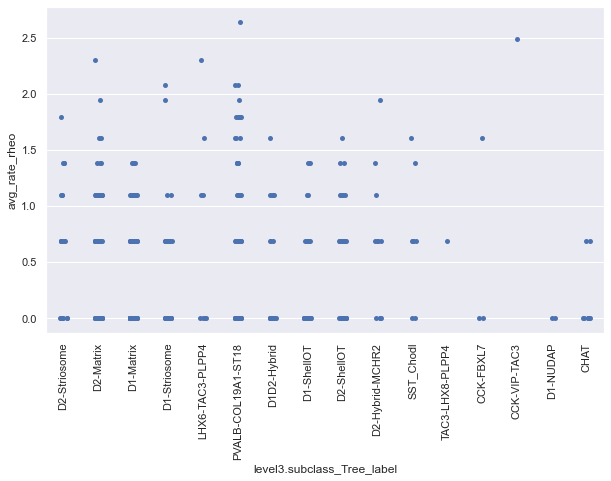

In [18]:
# Check that transformed distributions look more symmetrical

#feat = 'upstroke_downstroke_ratio_short_square'
#feat = 'total_inductive_phase_chirp'
#feat = 'phase_peak_chirp'
#feat = 'threshold_v_short_square'
#feat = 'width_ramp'
feat = 'avg_rate_rheo'
#feat = 'avg_rate_hero'

fig,ax = plt.subplots(figsize=(10, 6))
sns.stripplot(data=df_ephys_trans, x='level3.subclass_Tree_label', y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_trans.columns==feat)[0])

In [19]:
# Remove chirp features and impute
nonchirp_feat_inds = ["chirp" not in name for name in df_ephys_trans.columns]
df_ephys_trim = df_ephys_trans.iloc[:,nonchirp_feat_inds]

df3_filt_sub.reset_index(inplace=True, drop=True)

#target_names = iris.target_names    # unique list of target categories, indexable from the target numbers
X = df_ephys_trim.iloc[:,593:676]
y = df3_filt_sub['level3.subclass_Tree_label']    # Currently actually using the below

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
print("n samples:", n_samples)
print("n classes:", n_classes)
print("n features:", n_features)

n samples: 564
n classes: 16
n features: 83


In [20]:
#print(sum(nonchirp_feat_inds==False))
#df_ephys_trim = df_ephys_trans.iloc[:,nonchirp_feat_inds]
#df_ephys_trans.columns
X.columns

Index(['upstroke_downstroke_ratio_ramp', 'threshold_v_ramp', 'width_ramp',
       'upstroke_ramp', 'downstroke_ramp', 'width_suprathresh_ramp',
       'trough_v_ramp', 'threshold_i_ramp', 'postap_slope_ramp',
       'fast_trough_deltav_ramp', 'peak_deltav_ramp',
       'upstroke_downstroke_ratio_short_square', 'threshold_v_short_square',
       'width_short_square', 'upstroke_short_square',
       'downstroke_short_square', 'width_suprathresh_short_square',
       'peak_deltav_short_square', 'sag', 'sag_area', 'sag_tau', 'v_baseline',
       'rheobase_i', 'fi_fit_slope', 'vm_for_sag', 'input_resistance',
       'input_resistance_ss', 'tau', 'latency_rheo', 'avg_rate_rheo',
       'mean_isi_rheo', 'upstroke_downstroke_ratio_rheo', 'threshold_v_rheo',
       'peak_v_rheo', 'width_rheo', 'upstroke_rheo', 'downstroke_rheo',
       'width_suprathresh_rheo', 'trough_v_rheo', 'fast_trough_v_rheo',
       'postap_slope_rheo', 'fast_trough_v_last_rheo', 'adp_v_last_rheo',
       'adapt_hero', '

In [21]:
# Optional: imputation (e.g., after trimming anything with missing swaths)
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X)  

from sklearn.preprocessing import StandardScaler, RobustScaler

#scaler = RobustScaler()    # Produces weird results, maybe due to skew?
scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

y_orig = df3_filt_sub['level3.subclass_Tree_label']

mean_vec = np.mean(X_std, axis=0)
mean_vec    # Check it's zeroed

array([ 7.02353857e-16, -2.51965509e-17, -5.66922396e-17, -4.40939641e-17,
        1.00786204e-16, -2.48815940e-16,  6.80306875e-16,  9.76366348e-17,
       -1.25982755e-17, -1.19683617e-16,  6.45661617e-16,  2.01572407e-16,
       -1.13384479e-16,  4.47238779e-16, -2.14170683e-16, -1.16534048e-16,
        2.64563785e-16, -4.15743090e-16,  8.81879282e-17,  1.20313531e-15,
        3.77948264e-17,  1.99682666e-15, -1.70076719e-16, -3.77948264e-17,
       -1.02675945e-15,  3.30704731e-17, -6.29913773e-17,  4.53537916e-16,
       -2.26768958e-16, -1.38581030e-16, -3.02358611e-16,  2.01572407e-16,
       -1.63777581e-16, -2.74012491e-16, -5.03931018e-17,  3.37003868e-16,
        1.51179305e-16,  2.33068096e-16, -2.89760336e-16, -5.03931018e-16,
        3.14956886e-17, -6.42512048e-16,  1.76375856e-16,  1.25982755e-17,
       -1.25982755e-17,  8.81879282e-17,  7.55896527e-17,  1.25982755e-17,
       -5.19678863e-17, -1.00786204e-16, -5.29127569e-16, -4.78734467e-16,
        8.50383593e-17,  

In [ ]:
# How many nan values are there for each feature


In [22]:
# Two Way ANOVA

df_ephys_trim['D1orD2MS'] = 'Neither'
df_ephys_trim['D1orD2MS'][(y_orig == 'D1-Matrix') | (y_orig == 'D1-Striosome')] = 'D1'
df_ephys_trim['D1orD2MS'][(y_orig =='D2-Matrix') | (y_orig == 'D2-Striosome')] = 'D2'

df_ephys_trim['MS'] = 'Neither'
df_ephys_trim['MS'][(y_orig =='D1-Matrix') | (y_orig == 'D2-Matrix')] = 'Matrix'
df_ephys_trim['MS'][(y_orig =='D1-Striosome') | (y_orig == 'D2-Striosome')] = 'Striosome'

df_ephys_trim_ms = df_ephys_trim[df_ephys_trim['D1orD2MS']  != 'Neither']
df_ephys_trim_ms = df_ephys_trim_ms.iloc[:,593:678]
#inds = df_ephys_sub['D1orD2MS']  != 'Neither'
#y = X_std[inds]
#x1 = df_ephys_sub['D1orD2MS'][inds]
#x2 = df_ephys_sub['MS'][inds]

np2_vec_MS = np.empty([2, df_ephys_trim.shape[1]-4])
np2_vec_D12 = np.empty([2, df_ephys_trim.shape[1]-4])

i = 0 
for feat in df_ephys_trim_ms.columns[:83]:  
    print(feat)
    if feat != 'sag_tau':
        aov = pg.anova(dv=feat, between=["MS","D1orD2MS"], data=df_ephys_trim_ms,
                detailed=True)
        np2_vec_MS[0,i] = aov.np2[0].round(3)
        np2_vec_MS[1,i] = aov['p-unc'][0]
        np2_vec_D12[0,i] = aov.np2[1].round(3)
        np2_vec_D12[1,i] = aov['p-unc'][1]
    else:
        np2_vec_MS[0,i] = np.nan
        np2_vec_MS[1,i] = np.nan
        np2_vec_D12[0,i] = np.nan
        np2_vec_D12[1,i] = np.nan
    i+=1

# FDR Correction
rejects, pval_corr = pg.multicomp(np2_vec_MS[1,:], method='fdr_bh')
np2_vec_MS[1,:] = pval_corr
rejects, pval_corr = pg.multicomp(np2_vec_D12[1,:], method='fdr_bh')
np2_vec_D12[1,:] = pval_corr

data_tuples = list(zip(df_ephys_trim_ms.columns[:83],np2_vec_MS[0,:],np2_vec_MS[1,:]))
df_MS = pd.DataFrame(data_tuples)
df_MS.columns = ['Feature', 'Partial_eta_squared', 'p-value']

#df_MS = df_MS.sort_values(by='Partial_eta_squared', ascending=False)
df_MS = df_MS.sort_values(by='p-value', ascending=True)
#df_I.columns = df_ephys_sub_I.columns[2:]

min_ind = np.min(np.where(df_MS['p-value']<0.05))
print(min_ind)
print(df_MS)

data_tuples = list(zip(df_ephys_trim_ms.columns[:83],np2_vec_D12[0,:],np2_vec_D12[1,:]))
df_D12 = pd.DataFrame(data_tuples)
df_D12.columns = ['Feature', 'Partial_eta_squared', 'p-value']

#df_D12 = df_D12.sort_values(by='Partial_eta_squared', ascending=False)
df_D12 = df_D12.sort_values(by='p-value', ascending=True)
#df_I.columns = df_ephys_sub_I.columns[2:]

min_ind = np.min(np.where(df_D12['p-value']<0.05))
print(min_ind)
df_D12[1:10]


/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2185789737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ephys_trim['D1orD2MS'] = 'Neither'
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2185789737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ephys_trim['D1orD2MS'][(y_orig == 'D1-Matrix') | (y_orig == 'D1-Striosome')] = 'D1'
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2185789737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

upstroke_downstroke_ratio_ramp
threshold_v_ramp
width_ramp
upstroke_ramp
downstroke_ramp
width_suprathresh_ramp
trough_v_ramp
threshold_i_ramp
postap_slope_ramp
fast_trough_deltav_ramp
peak_deltav_ramp
upstroke_downstroke_ratio_short_square
threshold_v_short_square
width_short_square
upstroke_short_square
downstroke_short_square
width_suprathresh_short_square
peak_deltav_short_square
sag
sag_area
sag_tau
v_baseline
rheobase_i
fi_fit_slope
vm_for_sag
input_resistance
input_resistance_ss
tau
latency_rheo
avg_rate_rheo
mean_isi_rheo
upstroke_downstroke_ratio_rheo
threshold_v_rheo
peak_v_rheo
width_rheo
upstroke_rheo
downstroke_rheo
width_suprathresh_rheo
trough_v_rheo
fast_trough_v_rheo
postap_slope_rheo
fast_trough_v_last_rheo
adp_v_last_rheo
adapt_hero
avg_rate_hero
latency_hero
mean_isi_hero
median_isi_hero
isi_cv_hero
ir_late_hero
upstroke_downstroke_ratio_hero
threshold_v_hero
peak_v_hero
width_hero
upstroke_hero
downstroke_hero
width_suprathresh_hero
trough_v_hero
fast_trough_v_hero

,Feature,Partial_eta_squared,p-value
50,upstroke_downstroke_ratio_hero,0.106,3.475418e-07
11,upstroke_downstroke_ratio_short_square,0.091,5.653041e-06
51,threshold_v_hero,0.083,9.398119e-06
38,trough_v_rheo,0.078,1.644915e-05
69,width_adapt_ratio,0.075,3.954674e-05
35,upstroke_rheo,0.071,3.954674e-05
32,threshold_v_rheo,0.068,5.342738e-05
82,first_isi_inv_hero,0.071,5.500209e-05
79,peak_deltav_rheo,0.067,5.500209e-05


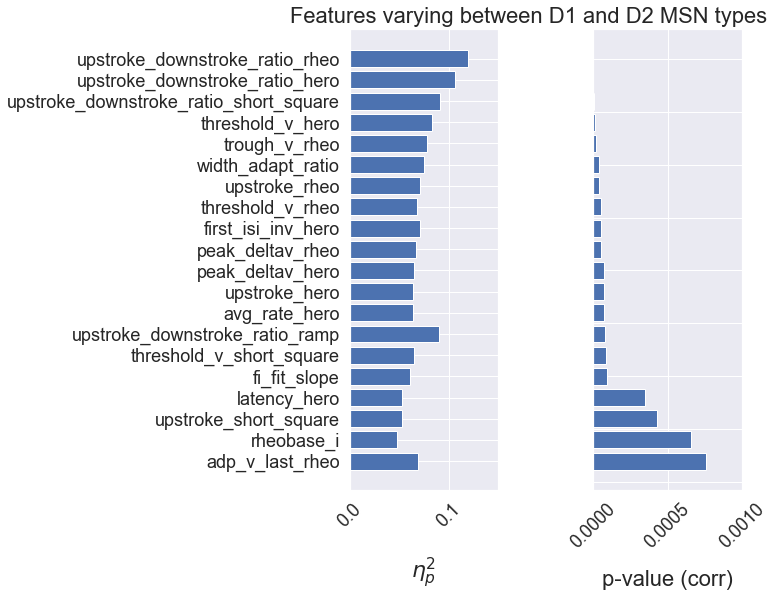

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(10.925, 8.55), sharey=False)
y_pos = np.arange(20)
#axs[1].bar(df_D12['Feature'][:20], df_D12['p-value'][:20])
axs[1].barh(y_pos, df_D12['p-value'][:20], align='center')
#axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation = 90, fontsize = 16)
axs[1].set_yticklabels([])
axs[1].set_xlabel('p-value (corr)', fontsize = 22, labelpad = 18)
axs[1].tick_params(axis='both', which='major', labelsize=18, rotation= 45)
#plt.setp(axs[1].get_xticklabels(), rotation=50, ha="center", rotation_mode="anchor")
axs[1].set_xlim([0.0,0.001])
axs[1].invert_yaxis()

#axs[0].barh(df_D12['Feature'][:20], df_D12['Partial_eta_squared'][:20])
axs[0].barh(y_pos, df_D12['Partial_eta_squared'][:20])
#axs[0].set_yticklabels(axs[1].get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor", fontsize = 22)
axs[0].tick_params(axis='both', which='major', labelsize=18, rotation = 45)
axs[0].set_yticks(y_pos, labels=df_D12['Feature'][:20], rotation = 0, ha = "right", rotation_mode = "anchor")
axs[0].set_xlabel(r'$\eta_{p}^{2}$', fontsize = 22, labelpad = 25)
axs[0].set_xlim([0,0.15])
axs[0].set_title('Features varying between D1 and D2 MSN types', fontsize = 22, x = 1.2)
axs[0].invert_yaxis()
#axs[0].set_title('Features varying between D1 and D2 MSN types', fontsize = 22)

fig.tight_layout()

In [27]:
#df_ephys_trim_ms.columns()
X_std.shape

(564, 83)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
0         DD2-Striosome
1            BD2-Matrix
2            AD1-Matrix
3            BD2-Matrix
4            BD2-Matrix
             ...       
559          AD1-Matrix
560         ED1-ShellOT
561    HD2-Hybrid-MCHR2
562        GD1D2-Hybrid
563        GD1D2-Hybrid
Name: level3.subclass_Tree_label, Length: 564, dtype: object
564
['AD1-Matrix' 'BD2-Matrix' 'CD1-Striosome' 'DD2-Striosome' 'ED1-ShellOT'
 'FD2-ShellOT' 'GD1D2-Hybrid' 'HD2-Hybrid-MCHR2' 'ID1-NUDAP' 'JCCK-FBXL7'
 'KCCK-VIP-TAC3' 'LCHAT' 'MLHX6-TAC3-PLPP4' 'NTAC3-LHX8-PLPP4'
 'OPVALB-COL19A1-ST18' 'PSST_Chodl']
Without crossvalidation:
                     precision    recall  f1-score   support

         AD1-Matrix       0.66      0.59      0.62       155
         BD2-Matrix       0.59      0.46      0.51       112
      CD1-Striosome       0.53      0.59      0.56        34
      DD2-Striosome       0.29      0.48      0.36        25
        ED1-

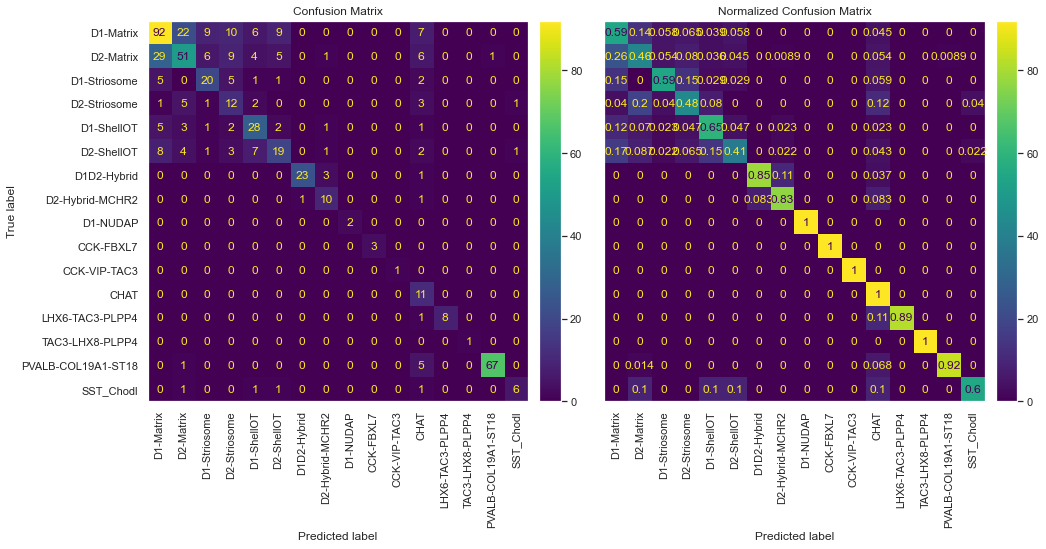

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.model_selection import train_test_split
X = X_std
y = y_orig
sorted_classes = ['D1-Matrix', 'D2-Matrix',  'D1-Striosome', 'D2-Striosome', 'D1-ShellOT', 'D2-ShellOT', 
                  'D1D2-Hybrid', 'D2-Hybrid-MCHR2', 'D1-NUDAP' , 'CCK-FBXL7', 'CCK-VIP-TAC3', 'CHAT', 
                  'LHX6-TAC3-PLPP4', 'TAC3-LHX8-PLPP4', 'PVALB-COL19A1-ST18', 'SST_Chodl']
# Prepend letters because sklearn sorts classes alphabetically
sorted_prefix = [chr(ord('@')+num+1) for num in  range(len(sorted_classes))]
print(sorted_prefix)
y_pref = [sorted_prefix[sorted_classes.index(yy)] for yy in y] + y_orig
y = y_pref
print(y_pref)
print(len(y_pref))
print(np.unique(y_pref))
#sorted_id = range(len(sorted_classes))
#y_id = [sorted_id[sorted_classes.index(yy)] for yy in y]
#inds = sorted(range(len(y_id)), key=lambda k: y_id[k])
#y_sorted = y[inds]
#X_sorted = X[inds,:]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c = 0.1

clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=c).fit(X, y)

# F1-macro slightly better on multi_class = 'multinomial' but this might be more sensical for distinguishing characteristics printout

#print(clf_lr.classes_)
#coef_sorted = np.empty_like(clf_lr.coef_)
#intercept_sorted = np.empty_like(clf_lr.intercept_)
#for i in range(len(clf_lr.coef_)):
#    coef_sorted[i,:] = clf_lr.coef_ [list(clf_lr.classes_).index(sorted_classes[i]),:]
#    intercept_sorted[i] = clf_lr.intercept_ [list(clf_lr.classes_).index(sorted_classes[i])]
#clf_lr.classes_ = sorted_classes
#clf_lr.coef_ = coef_sorted
#clf_lr.intercept_ = intercept_sorted
#print(clf_lr.coef_[0])

print("Without crossvalidation:")
print(classification_report(y, clf_lr.predict(X)))

y_pred = clf_lr.predict(X)
labels_cropped = [s[1:] for s in clf_lr.classes_]
print(labels_cropped)

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('Confusion Matrix')
cmp = ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels= labels_cropped, ax = ax[0], colorbar=False)
ax[0].grid(False)

# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=labels_cropped, ax = ax[1], normalize='true', 
                                        values_format = '.2g', colorbar=False)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)

print("Perc_correct", sum(y_pred==y)/len(y))

# SORT SUBCLASSES BY HIERARCHICAL CLUSTERING

82
82
82
83
83
0.8733333333333333
82
82
82
83
83
0.8733333333333333
82
82
82
83
83
0.8828571428571429
82


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _w

82
82
83
83
0.8828571428571429
82
82
82
83
83
0.8828571428571429
82
82
82
83
83
0.8828571428571429
82
82
82
83
83
0.8828571428571429
82
82
82
83


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _w

83
0.8828571428571429
82
82
82
83
83
0.8828571428571429
82
82
82
83
83
0.8733333333333333
82
82
82
83
83
0.8347619047619048
0.12
0.06


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


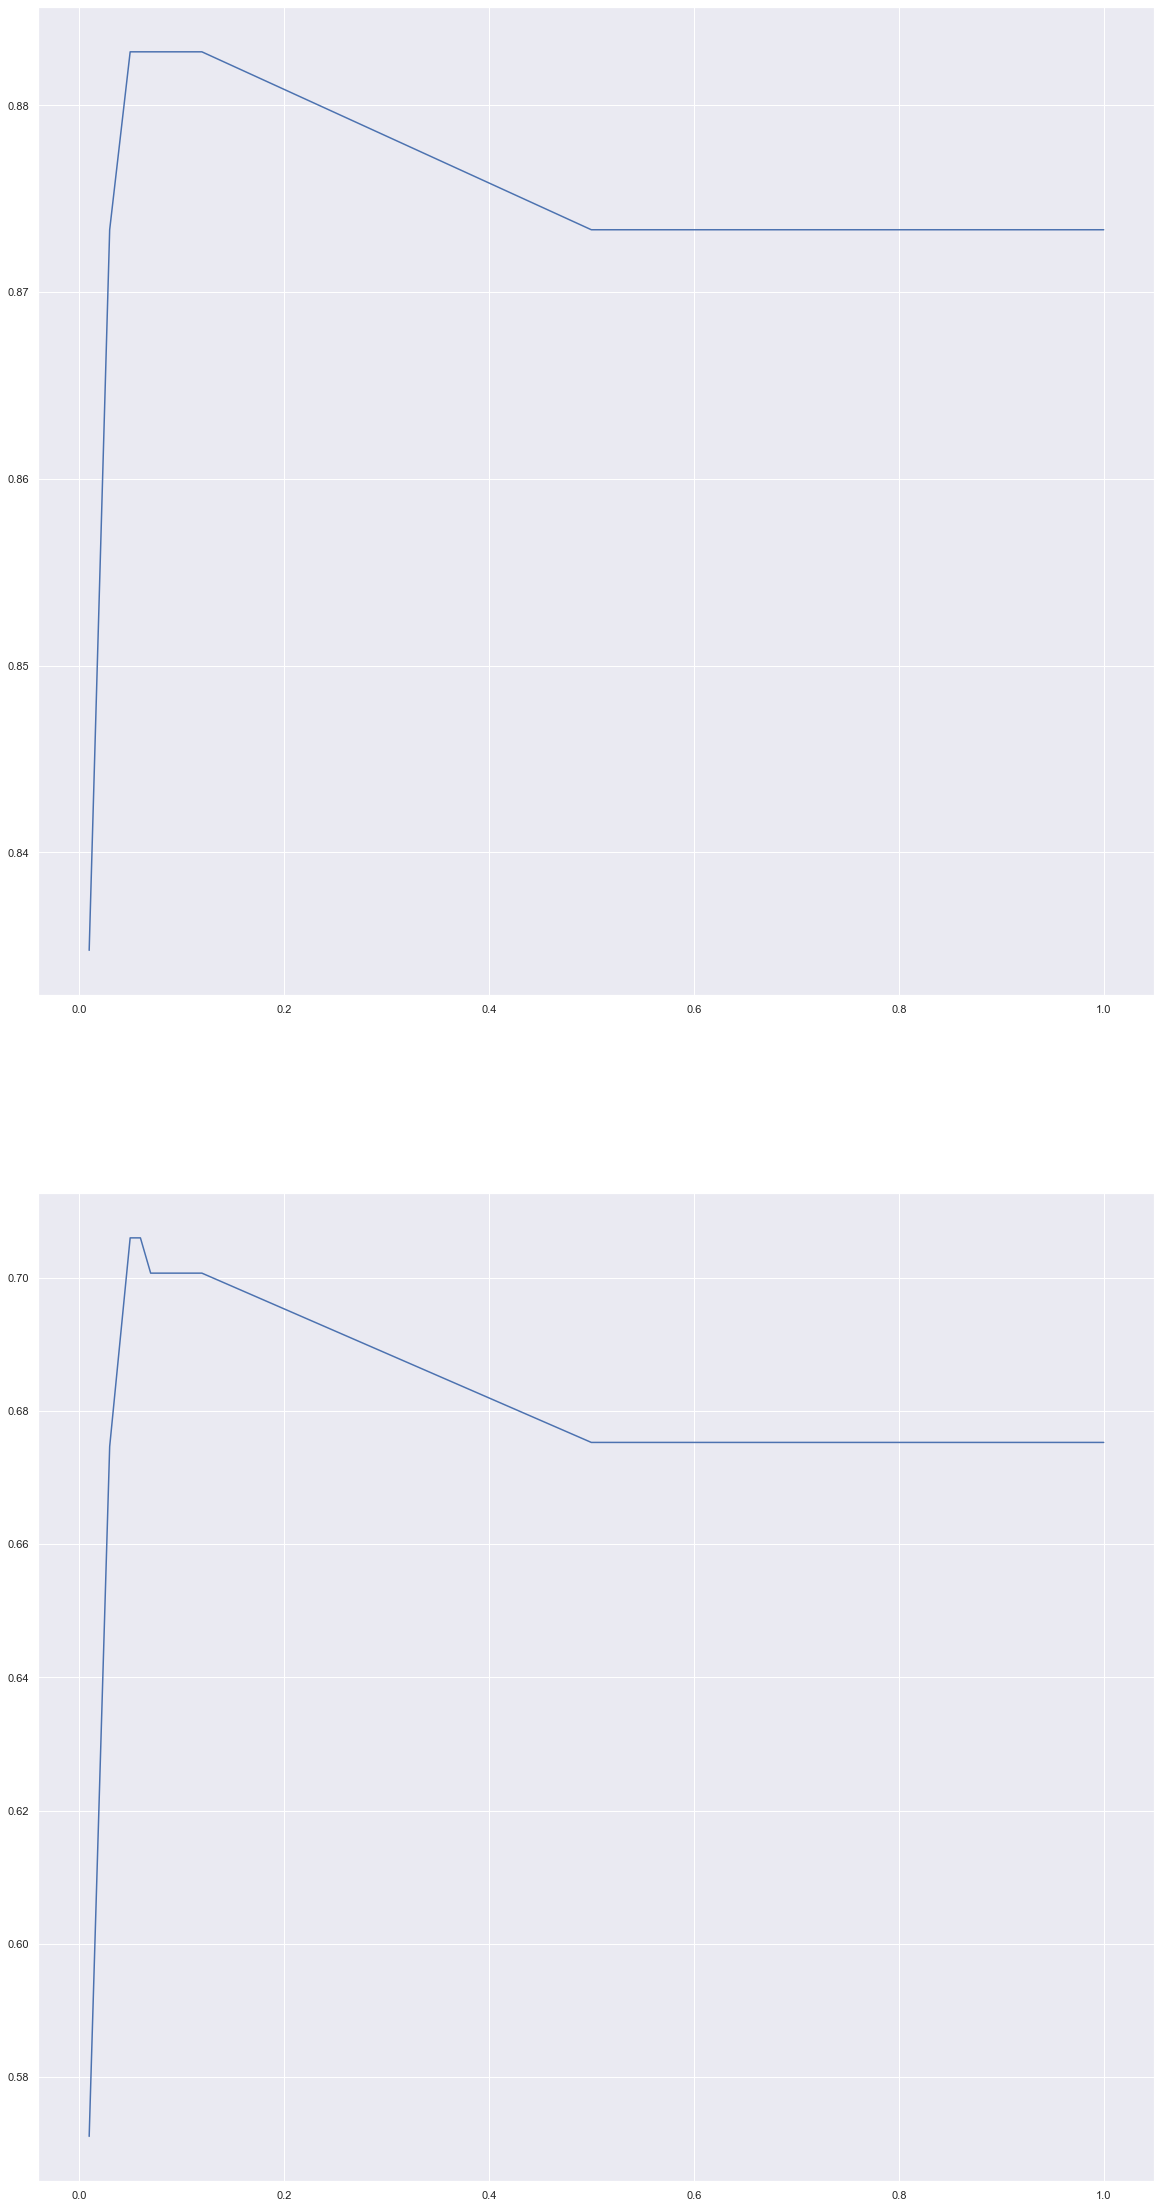

In [33]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

kf =KFold(n_splits=5, shuffle=True, random_state=1)

X = X_suff
y = y_suff

C_list = [1.0, 0.5, 0.12, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.03, 0.01]
perc_corr_all = []
f1_all = []

for c in C_list:
    perc_corr = []
    f1s = []
    for train_index, test_index in kf.split(X, y):

        print(len(train_index))
        clf_full = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", max_iter=1000, C=c).fit(X[train_index], y[train_index])

        #Predict the response for test dataset
        y_pred = clf_full.predict(X[test_index])

        perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
        f1 = f1_score(y[test_index], y_pred, average=None, labels = np.unique(y))
        f1s.append(f1)

    print(np.mean(perc_corr))
    perc_corr_all.append(np.mean(perc_corr))
    f1_all.append(np.mean(f1s))
    
fig,axs = plt.subplots(2,1)
axs[0].plot(C_list, perc_corr_all)
axs[1].plot(C_list, f1_all)
print(C_list[np.argmax(perc_corr_all)])
print(C_list[np.argmax(f1_all)])

In [80]:
# Remove subclasses with less than 5 cells - causes problems for crossvalidation scores further down and noisy
# Currently rmoves L5 PT, L6b, and SST Chodl

cts = y_orig.value_counts()
insuff_subclasses = cts.index[cts<5]
notinsuff_inds = [s not in insuff_subclasses for s in y_orig]
y_suff = y_orig[notinsuff_inds]
X_suff = X_std[notinsuff_inds,:]
insuff_subclasses
y_suff.reset_index(inplace=True, drop=True)
y_suff

0         D2-Striosome
1            D2-Matrix
2            D1-Matrix
3            D2-Matrix
4            D2-Matrix
            ...       
552          D1-Matrix
553         D1-ShellOT
554    D2-Hybrid-MCHR2
555        D1D2-Hybrid
556        D1D2-Hybrid
Name: level3.subclass_Tree_label, Length: 557, dtype: object

In [31]:
# Work on only inh cells
IN_subclasses = ['CHAT', 'LHX6-TAC3-PLPP4', 'PVALB-COL19A1-ST18', 'SST_Chodl']
keep_inds = [s in IN_subclasses for s in y_orig]
y_suff = y_orig[keep_inds]
X_suff = X_std[keep_inds,:]
y_suff.reset_index(inplace=True, drop=True)
y_suff

0         LHX6-TAC3-PLPP4
1      PVALB-COL19A1-ST18
2      PVALB-COL19A1-ST18
3      PVALB-COL19A1-ST18
4      PVALB-COL19A1-ST18
              ...        
98                   CHAT
99                   CHAT
100    PVALB-COL19A1-ST18
101                  CHAT
102             SST_Chodl
Name: level3.subclass_Tree_label, Length: 103, dtype: object

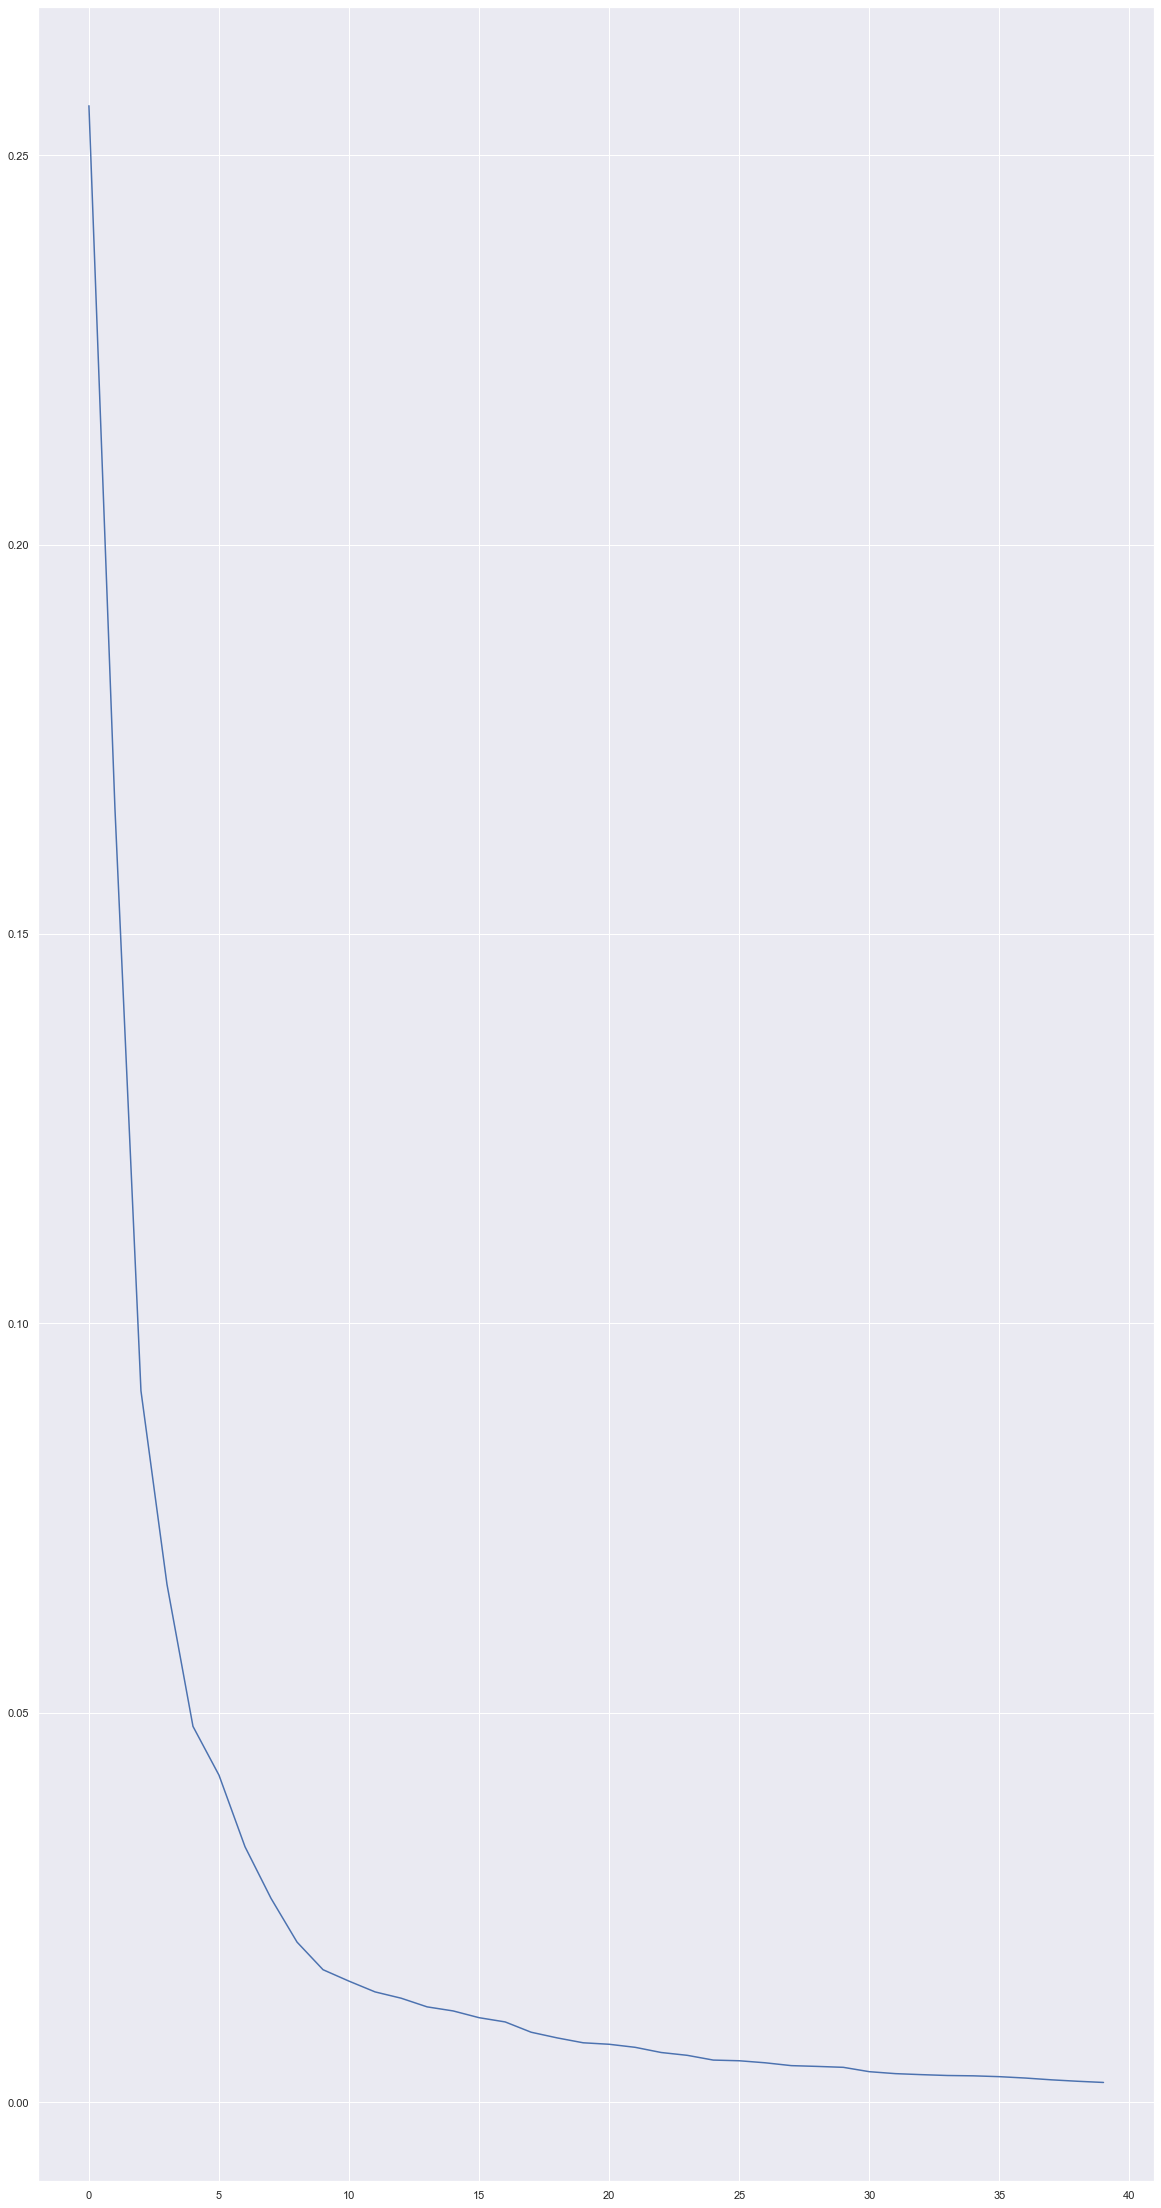

In [81]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
X_suff = pca.fit_transform(X_suff)
plt.plot(pca.explained_variance_ratio_)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
0         DD2-Striosome
1            BD2-Matrix
2            AD1-Matrix
3            BD2-Matrix
4            BD2-Matrix
             ...       
552          AD1-Matrix
553         ED1-ShellOT
554    GD2-Hybrid-MCHR2
555        HD1D2-Hybrid
556        HD1D2-Hybrid
Name: level3.subclass_Tree_label, Length: 557, dtype: object
557
['AD1-Matrix' 'BD2-Matrix' 'CD1-Striosome' 'DD2-Striosome' 'ED1-ShellOT'
 'FD2-ShellOT' 'GD2-Hybrid-MCHR2' 'HD1D2-Hybrid' 'LCHAT'
 'MLHX6-TAC3-PLPP4' 'OPVALB-COL19A1-ST18' 'PSST_Chodl']
['D1-Matrix', 'D2-Matrix', 'D1-Striosome', 'D2-Striosome', 'D1-ShellOT', 'D2-ShellOT', 'D2-Hybrid-MCHR2', 'D1D2-Hybrid', 'CHAT', 'LHX6-TAC3-PLPP4', 'PVALB-COL19A1-ST18', 'SST_Chodl']
Perc_correct 0.4614003590664273


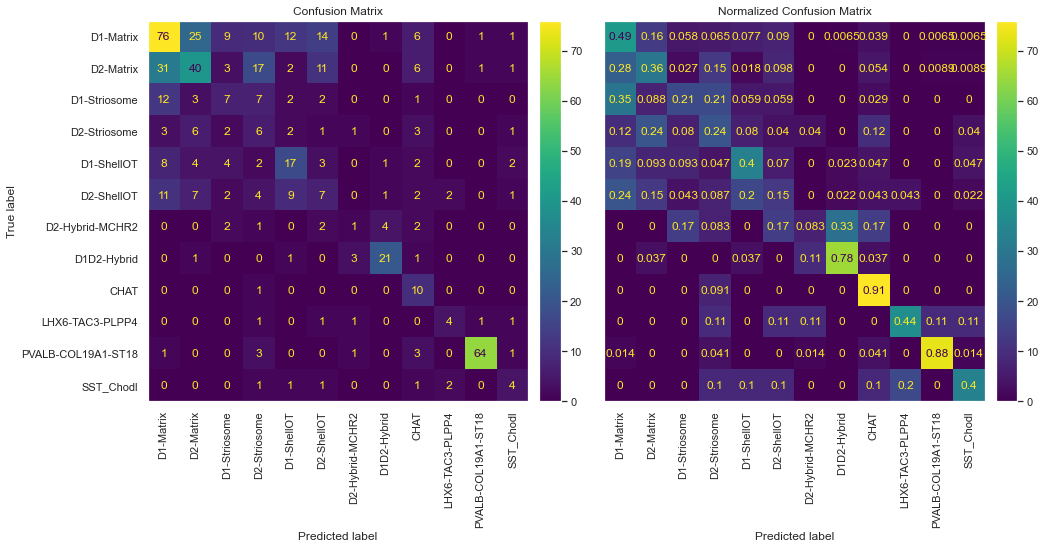

In [82]:
# Logistic Regression Crossvalidation Confusion Matrix
from sklearn.model_selection import train_test_split

X = X_suff
y = y_suff

sorted_classes = ['D1-Matrix', 'D2-Matrix',  'D1-Striosome', 'D2-Striosome', 'D1-ShellOT', 'D2-ShellOT', 
                  'D2-Hybrid-MCHR2', 'D1D2-Hybrid', 'D1-NUDAP' , 'CCK-FBXL7', 'CCK-VIP-TAC3', 'CHAT', 
                  'LHX6-TAC3-PLPP4', 'TAC3-LHX8-PLPP4', 'PVALB-COL19A1-ST18', 'SST_Chodl']
# Prepend letters because sklearn sorts classes alphabetically
sorted_prefix = [chr(ord('@')+num+1) for num in  range(len(sorted_classes))]
print(sorted_prefix)
y_pref = [sorted_prefix[sorted_classes.index(yy)] for yy in y] + y_suff
y = y_pref
print(y_pref)
print(len(y_pref))
print(np.unique(y_pref))

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

c = 0.07

kf =KFold(n_splits=4, shuffle=True, random_state=1)

y_pred_all = np.array([])
y_test_all = np.array([])
for train_index, test_index in kf.split(X, y):
    clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=c).fit(X[train_index], y[train_index])
 
    #clf_full = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", max_iter=1000, C=c).fit(X[train_index], y[train_index])

    #Predict the response for test dataset
    y_pred = clf_lr.predict(X[test_index])
    y_pred_all = np.concatenate((y_pred_all, y_pred))
    y_test_all = np.concatenate((y_test_all, y[test_index]))

#clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=c).fit(X_train, y_train)

#print("Crossvalidation:")
#print(classification_report(y_test, clf_lr.predict(X_test)))

#y_pred = clf_lr.predict(X_test)
labels_cropped = [s[1:] for s in clf_lr.classes_]
print(labels_cropped)

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('Confusion Matrix')
cmp = ConfusionMatrixDisplay.from_predictions(y_test_all, y_pred_all, display_labels= labels_cropped, ax = ax[0], colorbar=False)
ax[0].grid(False)

# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test_all, y_pred_all, display_labels=labels_cropped, ax = ax[1], normalize='true', 
                                        values_format = '.2g', colorbar=False)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)

print("Perc_correct", sum(y_pred_all==y_test_all)/len(y_test_all))


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Training accuracy: 0.9434
Test accuracy:     0.4677
Training
                     precision    recall  f1-score   support

         AD1-Matrix       0.99      0.95      0.97       103
         BD2-Matrix       1.00      0.93      0.96       103
      CD1-Striosome       1.00      0.93      0.96       103
      DD2-Striosome       1.00      0.91      0.95       103
        ED1-ShellOT       1.00      0.98      0.99       103
        FD2-ShellOT       1.00      0.95      0.98       103
   GD2-Hybrid-MCHR2       1.00      0.88      0.94       103
       HD1D2-Hybrid       1.00      1.00      1.00       103
              LCHAT       0.60      1.00      0.75       103
   MLHX6-TAC3-PLPP4       1.00      0.83      0.91       103
OPVALB-COL19A1-ST18       1.00      0.94      0.97       103
         PSST_Chodl       1.00      1.00      1.00       103

           accuracy                           0.94      1236
          macro avg       0.97      0.94      0.95      1236
       weighted avg   

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

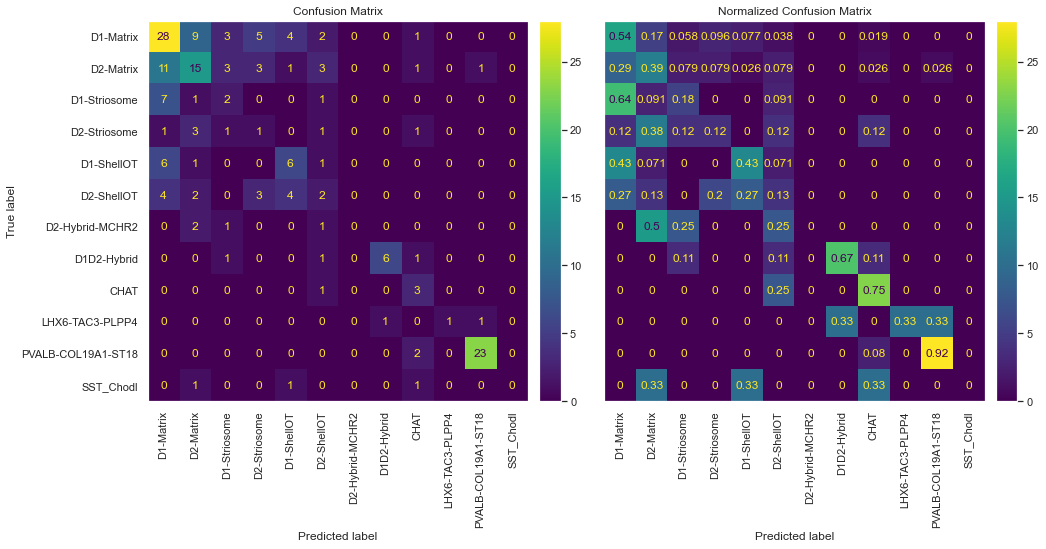

In [83]:
from logitboost import LogitBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import RandomOverSampler

test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=0)

ros = RandomOverSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train, y_train)

lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print('Training\n%s' % report_train)
print('Test\n%s' % report_test)

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('Confusion Matrix')
cmp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels= labels_cropped, ax = ax[0], colorbar=False)
ax[0].grid(False)

# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=labels_cropped, ax = ax[1], normalize='true', 
                                        values_format = '.2g', colorbar=False)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)


In [46]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#random_feat = np.random.choice(X_std.shape[1], sum(useful), replace=False)
#random_feat = np.random.choice(X_std.shape[1], 1, replace=False)
#print(random_feat)
X = X_suff
y = y_suff

feature_cols = imputer.feature_names_in_
#feature_cols = imputer.feature_names_in_[useful]
#feature_cols_rand = imputer.feature_names_in_[random_feat]
print(feature_cols)

kf =KFold(n_splits=5, shuffle=True, random_state=1)

perc_corr = []
for train_index, test_index in kf.split(X, y):
    # Create Decision Tree classifer object
    clf1 = RandomForestClassifier()

    # Train Decision Tree Classifer
    clf1 = clf1.fit(X[train_index],y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf1.predict(X[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
    
print("X_suff:", np.mean(perc_corr))

#perc_corr = []
#for train_index, test_index in kf.split(X_imputed, y):
#    # Create Decision Tree classifer object
#    clf2 = RandomForestClassifier()
#
#    # Train Decision Tree Classifer
#    clf2 = clf2.fit(X_imputed[train_index],y[train_index])
#    
#    #Predict the response for test dataset
#    y_pred = clf2.predict(X_imputed[test_index])
#    
#    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
#
#print("X_imputed:", np.mean(perc_corr))

#perc_corr = []
#for train_index, test_index in kf.split(X_imputed[:,useful], y):
#    # Create Decision Tree classifer object
#    clf3 = RandomForestClassifier()
#    X_imputed_sub = X_imputed[:, useful]
#    # Train Decision Tree Classifer
#    clf3 = clf3.fit(X_imputed_sub[train_index],y[train_index])
#    
#    #Predict the response for test dataset
#    y_pred = clf3.predict(X_imputed_sub[test_index])
#    
#    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))

#print("X_imputed, 'useful' only:", np.mean(perc_corr))

#perc_corr = []
#for train_index, test_index in kf.split(X_imputed[:,random_feat], y):
#    # Create Decision Tree classifer object
#    clf4 = RandomForestClassifier()
#    X_imputed_sub = X_imputed[:, random_feat]
#    print(X_imputed_sub.shape)
#    # Train Decision Tree Classifer
#    clf4 = clf4.fit(X_imputed_sub[train_index],y[train_index])
#    
#    #Predict the response for test dataset
#    y_pred = clf4.predict(X_imputed_sub[test_index])
#    
#    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))

print("X_imputed, random subset features:", np.mean(perc_corr))


['upstroke_downstroke_ratio_ramp' 'threshold_v_ramp' 'width_ramp'
 'upstroke_ramp' 'downstroke_ramp' 'width_suprathresh_ramp'
 'trough_v_ramp' 'threshold_i_ramp' 'postap_slope_ramp'
 'fast_trough_deltav_ramp' 'peak_deltav_ramp'
 'upstroke_downstroke_ratio_short_square' 'threshold_v_short_square'
 'width_short_square' 'upstroke_short_square' 'downstroke_short_square'
 'width_suprathresh_short_square' 'peak_deltav_short_square' 'sag'
 'sag_area' 'sag_tau' 'v_baseline' 'rheobase_i' 'fi_fit_slope'
 'vm_for_sag' 'input_resistance' 'input_resistance_ss' 'tau'
 'latency_rheo' 'avg_rate_rheo' 'mean_isi_rheo'
 'upstroke_downstroke_ratio_rheo' 'threshold_v_rheo' 'peak_v_rheo'
 'width_rheo' 'upstroke_rheo' 'downstroke_rheo' 'width_suprathresh_rheo'
 'trough_v_rheo' 'fast_trough_v_rheo' 'postap_slope_rheo'
 'fast_trough_v_last_rheo' 'adp_v_last_rheo' 'adapt_hero' 'avg_rate_hero'
 'latency_hero' 'mean_isi_hero' 'median_isi_hero' 'isi_cv_hero'
 'ir_late_hero' 'upstroke_downstroke_ratio_hero' 'thresh

In [100]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#random_feat = np.random.choice(X_std.shape[1], sum(useful), replace=False)
#random_feat = np.random.choice(X_std.shape[1], 1, replace=False)
#print(random_feat)
X = X_suff    # No PCA
y = y_suff

feature_cols = imputer.feature_names_in_
#feature_cols = imputer.feature_names_in_[useful]
#feature_cols_rand = imputer.feature_names_in_[random_feat]
print(feature_cols)

kf =KFold(n_splits=5, shuffle=True, random_state=1)

perc_corr = []
for train_index, test_index in kf.split(X, y):
    # Create Decision Tree classifer object
    clf1 = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf1 = clf1.fit(X[train_index],y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf1.predict(X[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
    
print("X_suff:", np.mean(perc_corr))

['upstroke_downstroke_ratio_ramp' 'threshold_v_ramp' 'width_ramp'
 'upstroke_ramp' 'downstroke_ramp' 'width_suprathresh_ramp'
 'trough_v_ramp' 'threshold_i_ramp' 'postap_slope_ramp'
 'fast_trough_deltav_ramp' 'peak_deltav_ramp'
 'upstroke_downstroke_ratio_short_square' 'threshold_v_short_square'
 'width_short_square' 'upstroke_short_square' 'downstroke_short_square'
 'width_suprathresh_short_square' 'peak_deltav_short_square' 'sag'
 'sag_area' 'sag_tau' 'v_baseline' 'rheobase_i' 'fi_fit_slope'
 'vm_for_sag' 'input_resistance' 'input_resistance_ss' 'tau'
 'latency_rheo' 'avg_rate_rheo' 'mean_isi_rheo'
 'upstroke_downstroke_ratio_rheo' 'threshold_v_rheo' 'peak_v_rheo'
 'width_rheo' 'upstroke_rheo' 'downstroke_rheo' 'width_suprathresh_rheo'
 'trough_v_rheo' 'fast_trough_v_rheo' 'postap_slope_rheo'
 'fast_trough_v_last_rheo' 'adp_v_last_rheo' 'adapt_hero' 'avg_rate_hero'
 'latency_hero' 'mean_isi_hero' 'median_isi_hero' 'isi_cv_hero'
 'ir_late_hero' 'upstroke_downstroke_ratio_hero' 'thresh

['CHAT' 'D1-Matrix' 'D1-ShellOT' 'D1-Striosome' 'D1D2-Hybrid'
 'D2-Hybrid-MCHR2' 'D2-Matrix' 'D2-ShellOT' 'D2-Striosome'
 'LHX6-TAC3-PLPP4' 'PVALB-COL19A1-ST18' 'SST_Chodl']


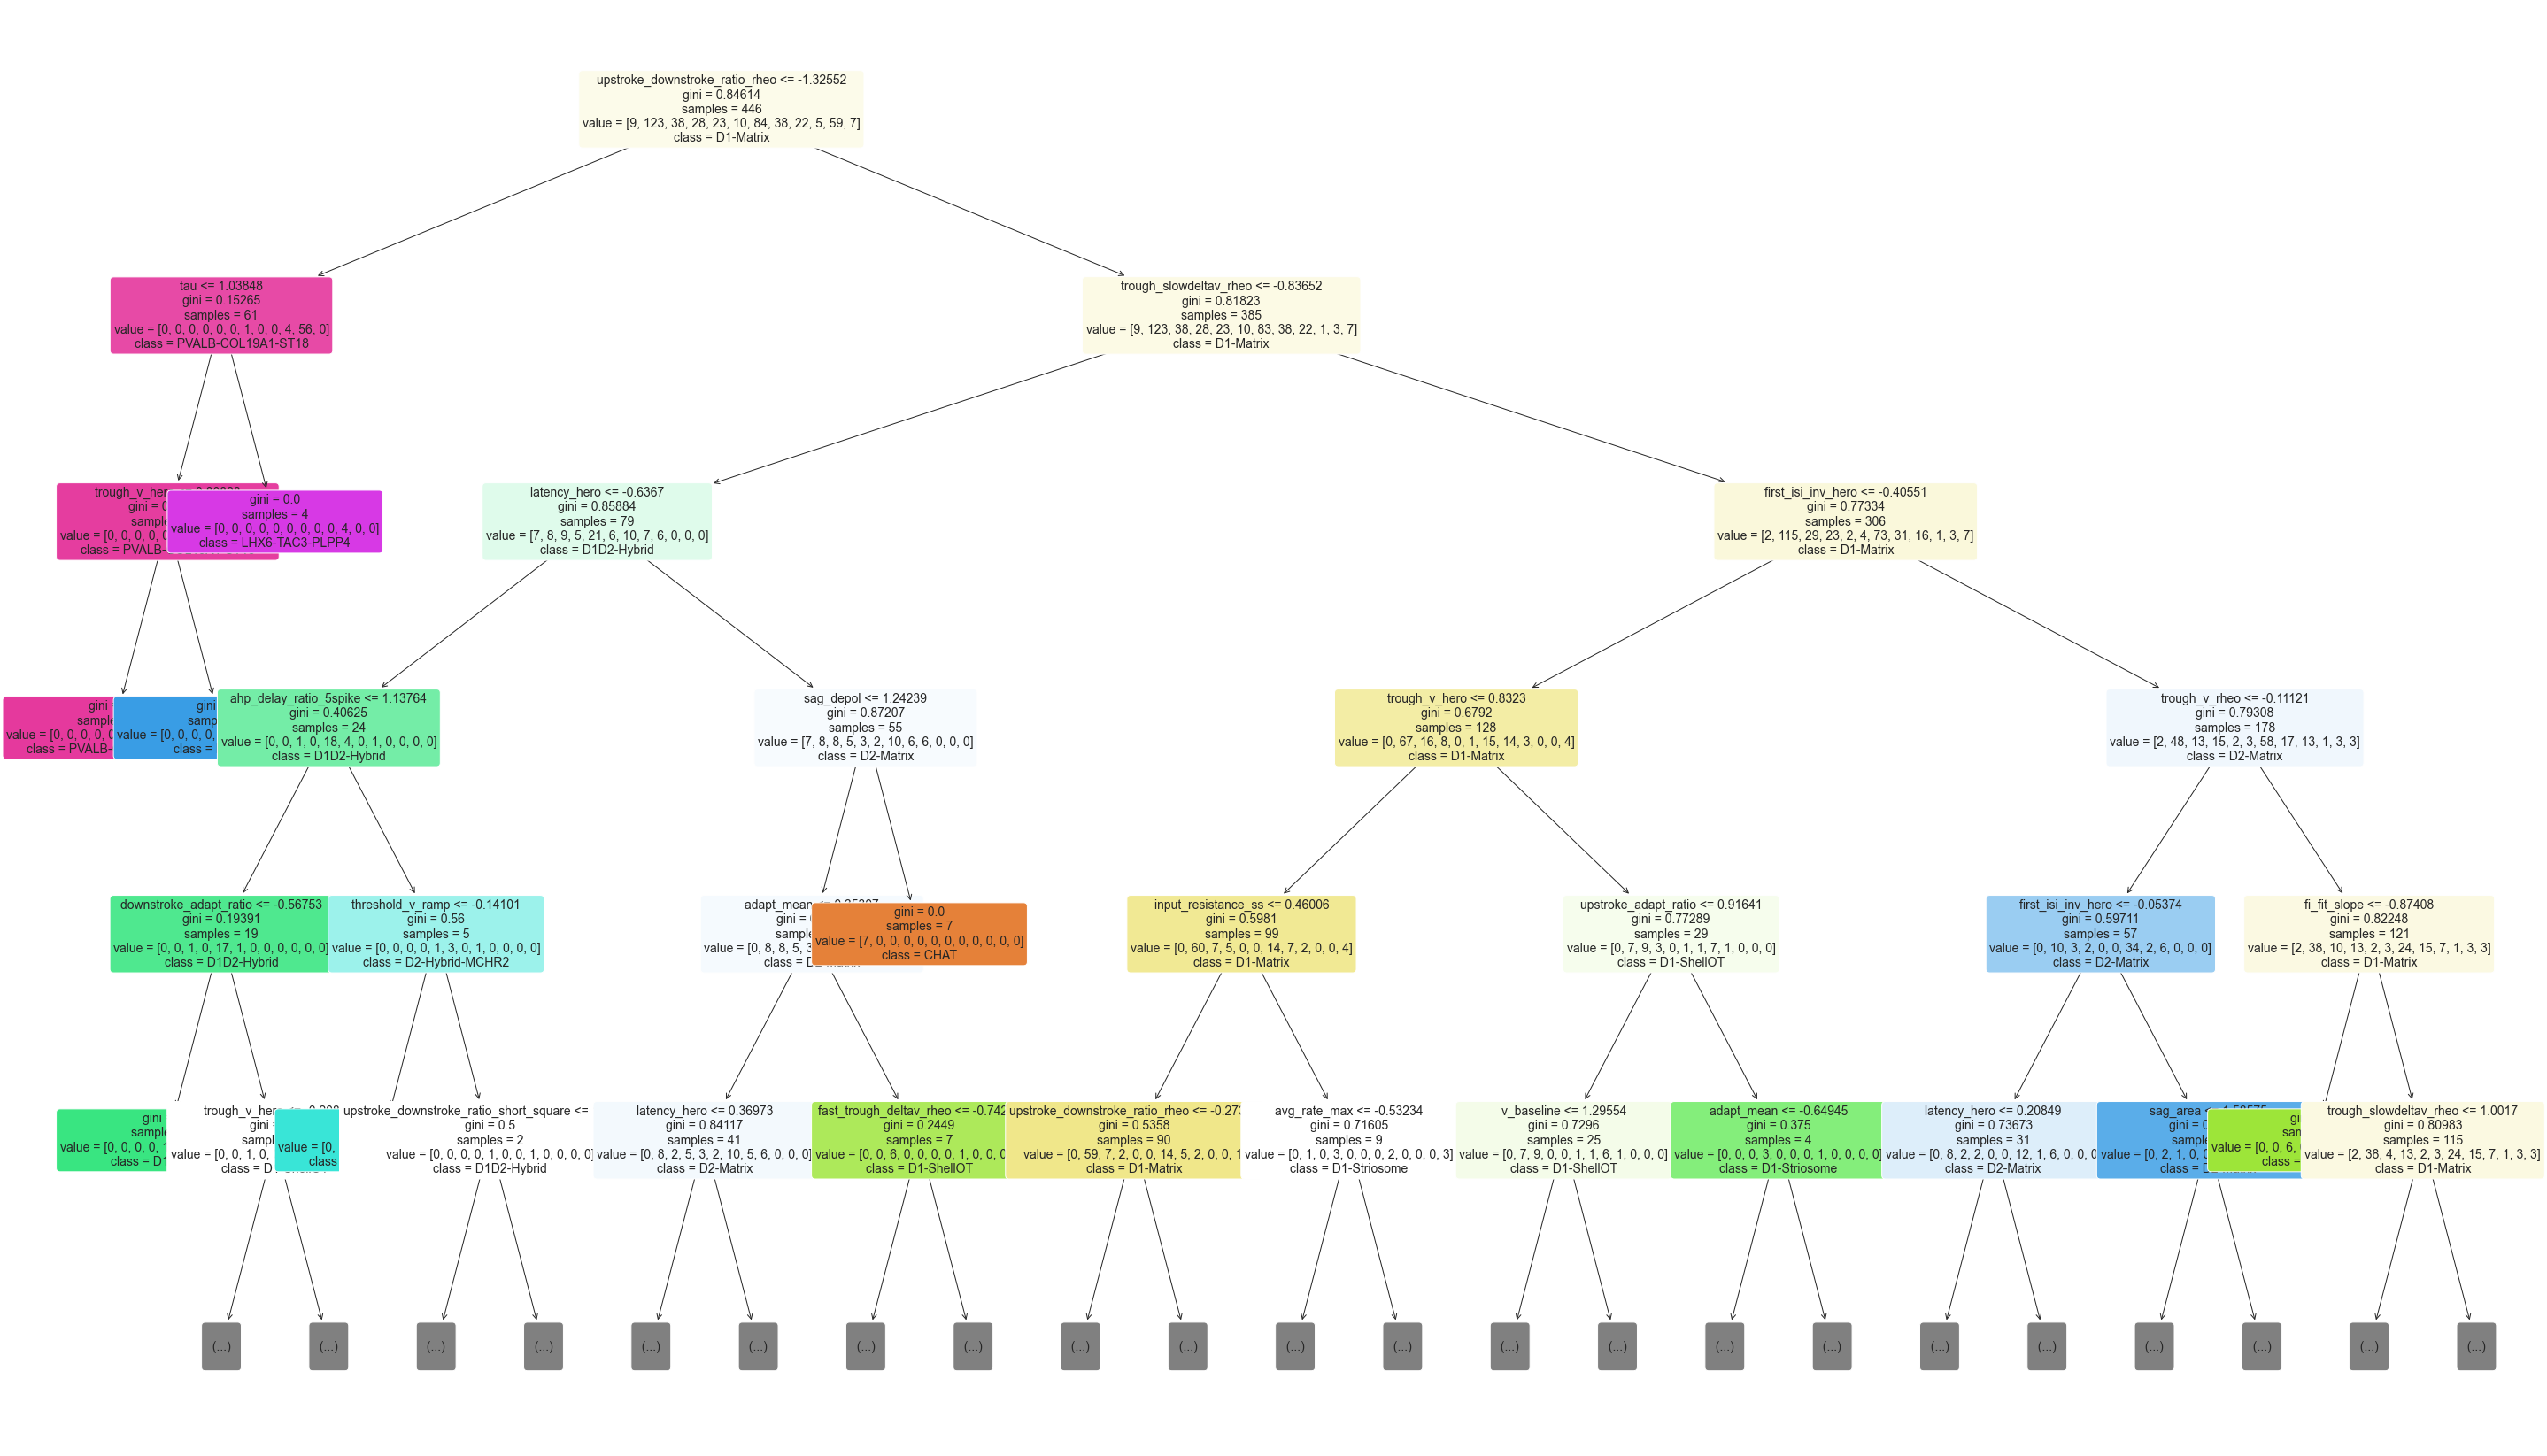

In [102]:
fig = plt.figure(figsize=(50,30))
class_names = clf1.classes_

_ = plot_tree(clf1, 
                   feature_names=feature_cols,
                   max_depth = 5,
                   filled=True,
                   fontsize = 14,
                   class_names = class_names,
                   #proportion=True
                   precision=5,
                   rounded=True)



fig.savefig("decision_tree.png", dpi=300)
print(class_names)


In [40]:
from MEBoost import MEBoost

ModuleNotFoundError: No module named 'imblearn'

In [22]:
# nclasses x nfeatures
df_I = pd.DataFrame(clf_lr.coef_, columns=df_ephys_trans.columns[594:686], index = clf_lr.classes_)

df_I

# WITHOUT DOING DIMENSIONALITY REDUCTION, WITH MANY COLINEAR FEATURES, YOU MAY HAVE DECENT PERFORMANCE BUT POOR COEFFICIENT INTERPRETABILITY

for cl in clf_lr.classes_:
    featsigns = df_I.loc[cl]
    featsigns[abs(featsigns)<0.8] = np.nan    # Threshold was 0.1
    featsigns.dropna(inplace=True)
    print(f"{cl}:{featsigns.round(decimals=2)}")

AD1-Matrix:threshold_v_rheo   -0.81
median_isi_hero    -0.91
downstroke_hero     0.96
Name: AD1-Matrix, dtype: float64
BD2-Matrix:upstroke_ramp            1.05
width_short_square       0.94
upstroke_short_square    0.88
input_resistance_ss     -0.86
width_rheo              -1.26
upstroke_rheo            0.84
downstroke_rheo          1.29
downstroke_hero          1.09
Name: BD2-Matrix, dtype: float64
CD1-Striosome:downstroke_ramp                  -0.81
postap_slope_ramp                -1.05
peak_deltav_ramp                  1.18
width_short_square               -0.99
upstroke_short_square            -0.94
downstroke_short_square           0.84
width_suprathresh_short_square   -0.80
threshold_v_rheo                 -1.04
postap_slope_rheo                 0.95
adp_v_last_rheo                   0.87
adapt_hero                       -0.91
avg_rate_hero                    -0.91
mean_isi_hero                     1.44
median_isi_hero                  -1.57
downstroke_adapt_ratio            0.8

     upstroke_downstroke_ratio_ramp  threshold_v_ramp  width_ramp  \
0                         -0.000754         -0.070235   -0.043213   
1                         -0.000754         -0.070235   -0.043213   
2                         -0.455217         -0.657826   -0.142958   
3                          0.173314         -0.891844   -0.062826   
4                         -0.415744         -0.472875    0.149290   
..                              ...               ...         ...   
526                       -0.000754         -0.070235   -0.043213   
527                        0.036620         -0.150158    0.567864   
528                       -0.054827          0.198353   -0.218377   
529                       -0.579973          0.739127    0.498432   
530                        0.148746         -0.661915    0.170973   

     upstroke_ramp  downstroke_ramp  width_suprathresh_ramp  trough_v_ramp  \
0         0.041290        -0.047358               -0.041200      -0.072377   
1         0.041

<Axes: xlabel='level3.subclass_Tree_label', ylabel='downstroke_ramp'>

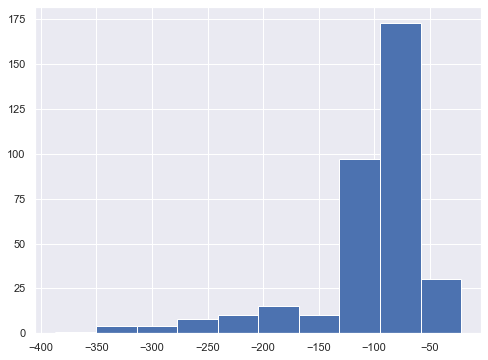

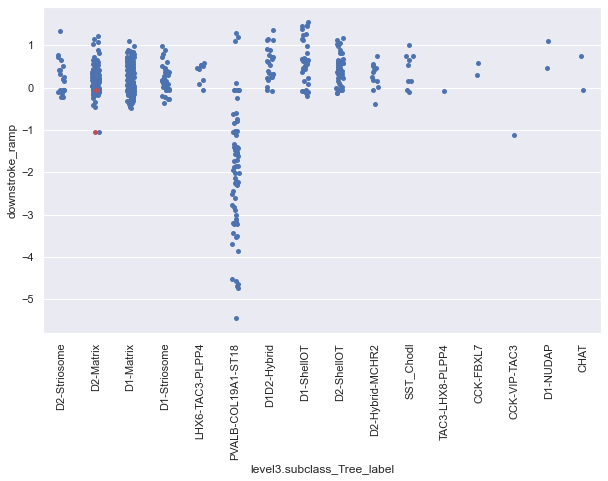

In [23]:
# See features after transforming and normalizing
#feat = 'width_rheo'
feat = 'downstroke_ramp'
#feat = 'avg_rate_rheo'
#feat = 'sag_tau'
#feat = 'downstroke_rheo'

#df_std = pd.DataFrame(df_ephys_trans.iloc[:,267:359], columns = df3_filt_sub.columns[267:359])
df_std = pd.DataFrame(X_std, columns = df3_filt_sub.columns[594:686])
print(df_std)
df_std['level3.subclass_Tree_label'] = df3_filt_sub['level3.subclass_Tree_label']

#(n, bins, patches) = plt.hist(df_ephys_sub[feat][df_ephys_sub[feat]<0.1], bins = 50)   # Needs log transform
#min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
#feat_vals = np.log(df_ephys_sub[feat]+min_nonzero) 
#plt.hist(feat_vals)
fig,ax = plt.subplots(figsize=(8, 6))
plt.hist(df_ephys_sub_no_outliers[feat])

fig,ax = plt.subplots(figsize=(10, 6))
sns.stripplot(data=df_std, x='level3.subclass_Tree_label', y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_sub.columns==feat)[0])

sns.stripplot(data=df_std.iloc[list(feat_outliers[feat_ind])], x='level3.subclass_Tree_label', y=feat, ax=ax, color='r')
#plt.yscale("log")
#plt.xlim([-1,15])
# Because they were set to Nan, they got imputed

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

feature_cols = comp_names
print(feature_cols)

#X_transformed = X_std @ df_spca.values
#X = X_transformed
X = X_std
#X = np.array(X_suff)
#y = np.array(y_suff)
y = y_orig

n_splits = 5
kf =KFold(n_splits=n_splits, shuffle=True, random_state=1)

max_depth_list = [2,3,4,5,6,7,8,9,10,15,20]
perc_corr_test_md = []
perc_corr_train_md = []

for md in max_depth_list:
    perc_corr_test = []
    perc_corr_train = []

    for train_index, test_index in kf.split(X, y):
        # Create classifer object
        clf2 = DecisionTreeClassifier(max_depth=md)

        # Train classifer
        clf2 = clf2.fit(X[train_index],y[train_index])

        #Predict the response for test dataset
        y_pred = clf2.predict(X[test_index])
        y_pred_train = clf2.predict(X[train_index])

        perc_corr_test.append(sum(y_pred==y[test_index])/len(y[test_index]))
        perc_corr_train.append(sum(y_pred_train == y[train_index])/len(y[train_index]))

    print("Test", np.mean(perc_corr_test))
    print("Train", np.mean(perc_corr_train))
    perc_corr_test_md.append(np.mean(perc_corr_test))
    perc_corr_train_md.append(np.mean(perc_corr_train))

plt.plot(max_depth_list, perc_corr_test_md)
plt.plot(max_depth_list, perc_corr_train_md)
plt.xlabel("Max depth")
plt.ylabel("Percent Accuracy")
plt.legend(["Test", "Train"])
plt.show()
print("Best:", max_depth_list[np.argmax(perc_corr_test_md)])

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X,y)
y_pred = clf2.predict(X)
f1 = f1_score(y, y_pred, average=None)
df_f1 = pd.DataFrame(clf2.classes_,f1)
df_f1

In [24]:
# Sparse principal component analysis

feat_names = df_ephys_sub.columns[:92]
#print(feat_names)
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = df_ephys_sub.columns[:92]

#In R: para=rep(300, ncomp)   --> 22 components

# Sparse PCA in R
X_std_df.to_feather('X_std_BG.feather')
# Process then in R elasticnet implementation

# Consider using a PEV threshold?


In [25]:
df_spca = pd.read_feather('spca_comps.feather')
sums = df_spca.abs().sum(axis=0)

df_spca = df_spca.drop(df_spca.columns[sums==0],axis = 1)

In [26]:
print(feat_names[np.nonzero(df_spca.iloc[:,0].values)])
comp_names = ['downstroke-width']

Index(['downstroke_ramp', 'width_suprathresh_ramp', 'width_short_square',
       'downstroke_short_square', 'width_suprathresh_short_square',
       'width_rheo', 'downstroke_rheo', 'width_hero',
       'width_suprathresh_hero'],
      dtype='object')


In [27]:
print(feat_names[np.nonzero(df_spca.iloc[:,1].values)])
comp_names.append('upstroke-peak')

Index(['upstroke_downstroke_ratio_ramp', 'peak_deltav_ramp',
       'upstroke_downstroke_ratio_short_square', 'upstroke_short_square',
       'peak_deltav_short_square', 'upstroke_downstroke_ratio_rheo',
       'peak_v_rheo', 'upstroke_rheo', 'upstroke_downstroke_ratio_hero',
       'peak_v_hero', 'upstroke_hero', 'peak_deltav_rheo', 'peak_deltav_hero',
       'phase_peak_chirp'],
      dtype='object')


In [28]:
print(feat_names[np.nonzero(df_spca.iloc[:,2].values)])
comp_names.append('chirp')

Index(['peak_freq_chirp', '3db_freq_chirp', 'peak_impedance_chirp',
       'sync_freq_chirp'],
      dtype='object')


In [29]:
print(feat_names[np.nonzero(df_spca.iloc[:,3].values)])
comp_names.append('fast_trough')

Index(['fast_trough_deltav_ramp', 'fast_trough_deltav_rheo',
       'fast_trough_deltav_hero'],
      dtype='object')


In [30]:
print(feat_names[np.nonzero(df_spca.iloc[:,4].values)])
comp_names.append('threshold-trough')

Index(['threshold_v_ramp', 'trough_v_ramp', 'threshold_v_short_square',
       'threshold_v_rheo', 'trough_v_rheo', 'fast_trough_v_rheo',
       'fast_trough_v_last_rheo', 'adp_v_last_rheo', 'threshold_v_hero',
       'trough_v_hero', 'fast_trough_v_hero'],
      dtype='object')


In [31]:
print(feat_names[np.nonzero(df_spca.iloc[:,5].values)])
comp_names.append('isi_cv')

Index(['isi_cv_mean'], dtype='object')


In [32]:
print(feat_names[np.nonzero(df_spca.iloc[:,6].values)])
comp_names.append('trough_slowdeltav')

Index(['trough_slowdeltav_rheo', 'trough_slowdeltav_hero'], dtype='object')


In [33]:
print(feat_names[np.nonzero(df_spca.iloc[:,7].values)])
comp_names.append('isi_hero')

Index(['mean_isi_hero', 'median_isi_hero'], dtype='object')


In [34]:
print(feat_names[np.nonzero(df_spca.iloc[:,8].values)])
comp_names.append('peak_v_adapt_ratio')

Index(['upstroke_adapt_ratio', 'peak_v_adapt_ratio'], dtype='object')


In [35]:
print(feat_names[np.nonzero(df_spca.iloc[:,9].values)])
comp_names.append('rheobase_Rin')

Index(['threshold_i_ramp', 'rheobase_i', 'input_resistance_ss',
       'low_freq_impedance_chirp'],
      dtype='object')


In [36]:
print(feat_names[np.nonzero(df_spca.iloc[:,10].values)])
comp_names.append('postap_slope')

Index(['postap_slope_ramp', 'postap_slope_rheo', 'postap_slope_hero'], dtype='object')


In [37]:
print(feat_names[np.nonzero(df_spca.iloc[:,11].values)])
comp_names.append('isi_rheo')

Index(['sag_area'], dtype='object')


In [38]:
print(feat_names[np.nonzero(df_spca.iloc[:,12].values)])
comp_names.append('vm_for_sag')

Index(['v_baseline', 'vm_for_sag'], dtype='object')


In [39]:
print(feat_names[np.nonzero(df_spca.iloc[:,13].values)])
comp_names.append('latency')

Index(['latency_rheo', 'latency_hero'], dtype='object')


In [40]:
print(feat_names[np.nonzero(df_spca.iloc[:,14].values)])
comp_names.append('sag_tau')

Index(['sag_tau_depol'], dtype='object')


In [41]:
print(feat_names[np.nonzero(df_spca.iloc[:,15].values)])
comp_names.append('avg_rate_rheo')

Index(['avg_rate_rheo'], dtype='object')


In [42]:
print(feat_names[np.nonzero(df_spca.iloc[:,16].values)])
comp_names.append('phase_low_chirp')

Index(['phase_low_chirp'], dtype='object')


In [43]:
print(feat_names[np.nonzero(df_spca.iloc[:,17].values)])
comp_names.append('sag_depol')

Index(['sag_depol', 'sag_area_depol'], dtype='object')


In [44]:
print(feat_names[np.nonzero(df_spca.iloc[:,18].values)])
comp_names.append('sag')

Index(['sag'], dtype='object')


In [45]:
print(feat_names[np.nonzero(df_spca.iloc[:,19].values)])
comp_names.append('sag_tau')

Index(['sag_tau'], dtype='object')


In [46]:
print(feat_names[np.nonzero(df_spca.iloc[:,20].values)])
comp_names.append('fi_rates')

Index(['fi_fit_slope', 'avg_rate_hero', 'avg_rate_max'], dtype='object')


In [47]:
print(feat_names[np.nonzero(df_spca.iloc[:,21].values)])
comp_names.append('Rin')

Index(['input_resistance'], dtype='object')


In [71]:
print(feat_names[np.nonzero(df_spca.iloc[:,22].values)])
#comp_names.append('sag_depol')

IndexError: single positional indexer is out-of-bounds

In [72]:
print(feat_names[np.nonzero(df_spca.iloc[:,23].values)])
#comp_names.append('sag_depol')

IndexError: single positional indexer is out-of-bounds

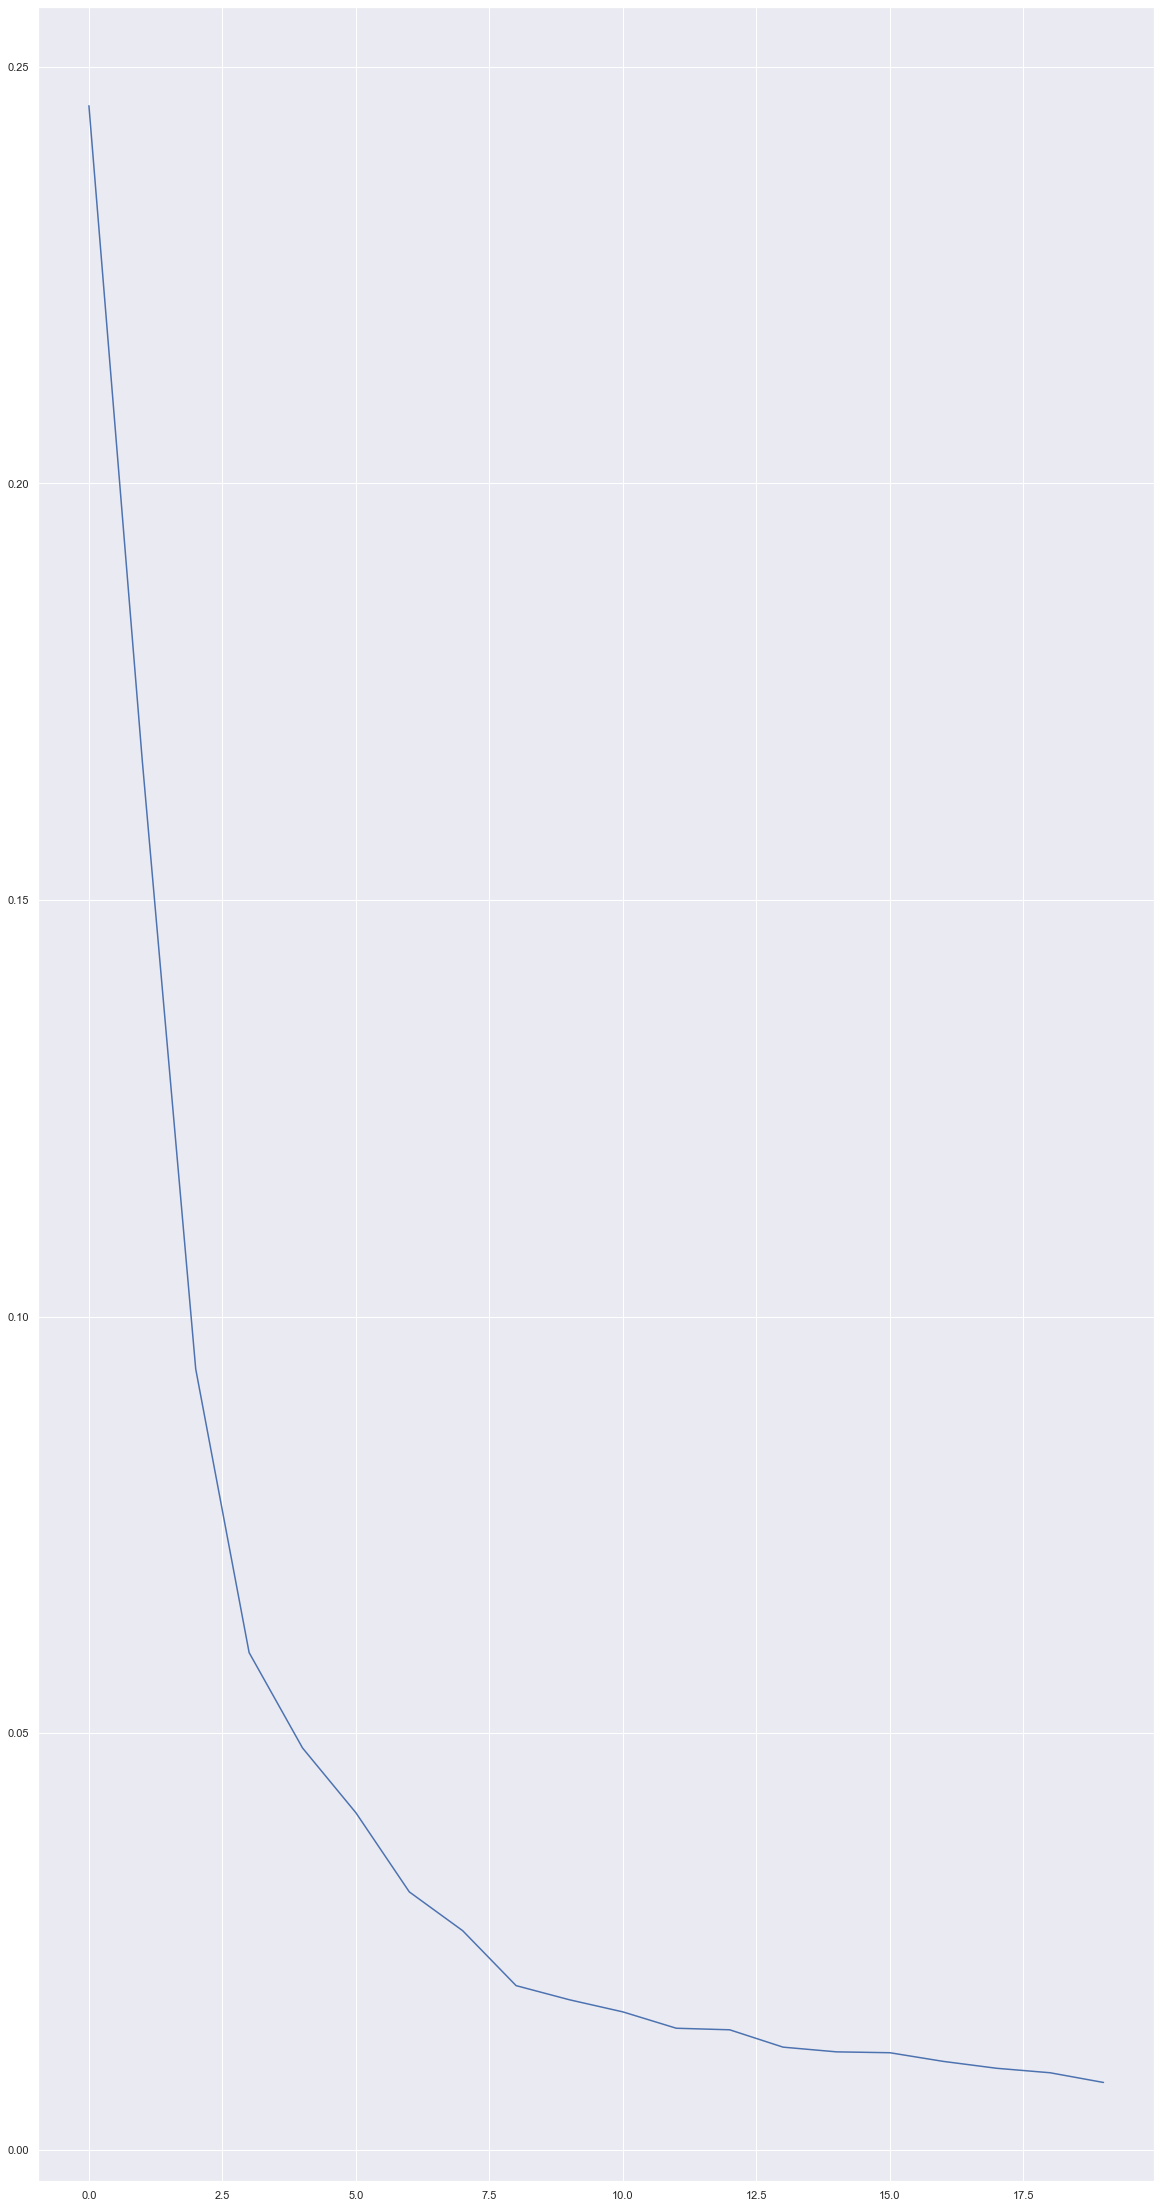

In [66]:
# Plain PCA with its own imputation?
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X_std)
X_pca = pca.transform(X_std)
plt.plot(pca.explained_variance_ratio_)


In [69]:
# Remove subclasses with less than 5 cells - causes problems for crossvalidation scores further down and noisy
# Currently removes 'CCK-FBXL7', 'D1-NUDAP', 'CHAT', 'TAC3-LHX8-PLPP4', 'CCK-VIP-TAC3'

cts = y_orig.value_counts()
insuff_subclasses = cts.index[cts<5]
notinsuff_inds = [s not in insuff_subclasses for s in y_orig]
y_suff = y_orig[notinsuff_inds]
#X_suff = X_pca[notinsuff_inds,:]
X_suff = X_std[notinsuff_inds,:]
y_suff = y_suff.reset_index(drop=True)

print(insuff_subclasses)

Index(['CCK-FBXL7', 'D1-NUDAP', 'CHAT', 'TAC3-LHX8-PLPP4', 'CCK-VIP-TAC3'], dtype='object')


Perc_correct 0.6749521988527725
0.4767529183895717
0.003
C with best perc_corr_test: 0.003


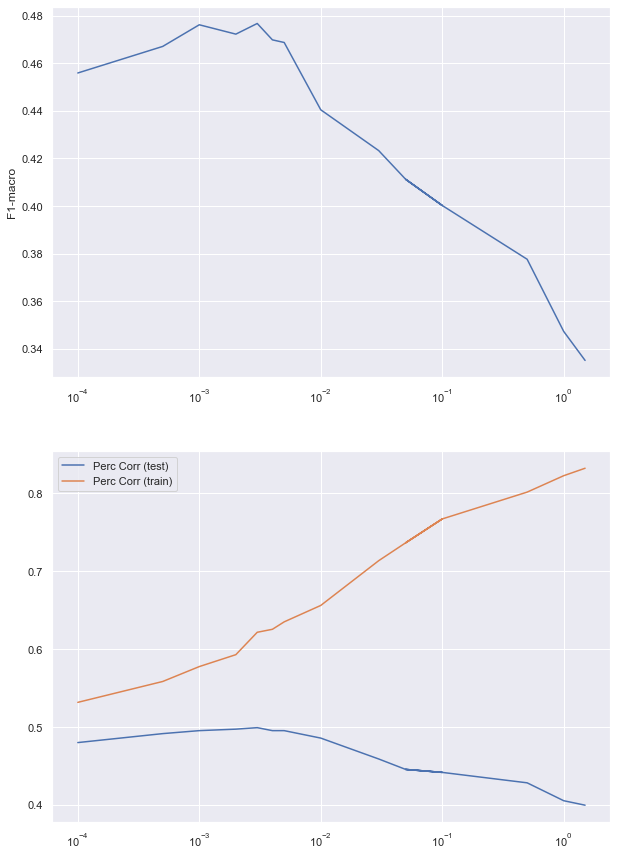

In [70]:
# Crossvalidation on common types and confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

kf =KFold(n_splits=2, shuffle=True, random_state=1)

X_transformed = X_std @ df_spca.values

#X = X_transformed    
#X = X_std
#y = y_orig
X = X_suff
y = y_suff

#C_list = [5.0, 3.0, 1.0, 0.8, 0.5, 0.1, 0.09, 0.08, 0.07, 0.05]
C_list = [1.5, 1.0, 0.5, 0.1, 0.05, 0.1, 0.05, 0.03, 0.01, 0.005, 0.004, 0.003, 0.002, 0.001, 0.0005, 0.0001]
perc_corr_all = []
perc_corr_all_train = []
f1_all = []
roc_auc_ovr = []

# Worse performance than using original features
clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=1).fit(X, y)
y_pred = clf_lr.predict(X)
print("Perc_correct", sum(y_pred==y)/len(y))
# 0.53 with X_transformed
# 0.696 with X_std - why was it 0.69 last time?

for c in C_list:
    perc_corr = []
    perc_corr_train = []
    f1_list = []
    roc_list = []
    for train_index, test_index in kf.split(X, y):
        #clf_lr = LogisticRegression(solver="saga", multi_class='ovr', penalty = "elasticnet", l1_ratio = 0.5, max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        #clf_lr = LogisticRegression(solver="liblinear", multi_class='ovr', penalty = "l2", max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        #clf_lr = LogisticRegression(solver="lbfgs", multi_class='multinomial', penalty = "l2", max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=c).fit(X[train_index], y[train_index])
        #Predict the response for test dataset
        y_pred = clf_lr.predict(X[test_index])
        f1 = f1_score(y[test_index], y_pred, average="macro")
        perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
        y_pred_train = clf_lr.predict(X[train_index])
        perc_corr_train.append(sum(y_pred_train==y[train_index])/len(y[train_index]))
        f1_list.append(f1)
        #roc = roc_auc_score(y[test_index], clf_lr.predict_proba(X[test_index]), average="macro", multi_class = 'ovr')
        #roc_list.append(roc)
    #print('Perc_corr:', np.mean(perc_corr))
    #print('Perc_corr_train:', perc_corr_train)
    #print(np.mean(f1_list))
    #print(np.mean(roc_list))
    perc_corr_all.append(np.mean(perc_corr))
    perc_corr_all_train.append(np.mean(perc_corr_train))
    f1_all.append(np.mean(f1_list))
    #roc_auc_ovr.append(np.mean(roc_list))

fig, ax = plt.subplots(2,1, figsize=(10, 15))
    
ax[0].plot(C_list, f1_all)
ax[0].set_ylabel('F1-macro')
ax[0].set_xscale("log")

#plt.figure()
#plt.plot(C_list, roc_auc_ovr)
#plt.ylabel('ROC_AUC_OVR')

ax[1].plot(C_list, perc_corr_all, label = 'Perc Corr (test)')
#ax[1].set_ylabel('Perc Correct (test)')

ax[1].plot(C_list, perc_corr_all_train, label = 'Perc Corr (train)')
#ax[1].set_ylabel('Perc Correct (train)')
plt.legend()
plt.xscale("log")
#plt.show()
#ax[1].legend([line1, line2], ['Perc Corr (test)', 'Perc Corr (train)'])
#ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])
#ax[1].legend(['Perc Corr (test)', 'Perc Corr (train)'])

print(max(f1_all))
print(C_list[np.argmax(f1_all)])
C_opt = C_list[np.argmax(f1_all)]
print("C with best perc_corr_test:", C_list[np.argmax(perc_corr_all)])

# Still a hair better than PCA

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
0.46946564885496184


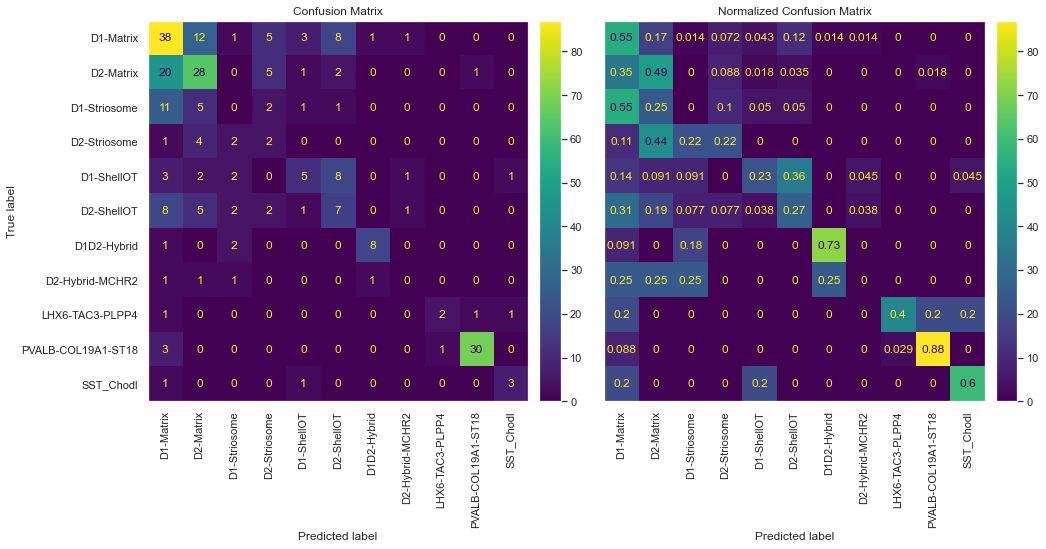

In [63]:
# Using best C, generate confusion matrix
# Prepend letters because sklearn sorts classes alphabetically
sorted_prefix = [chr(ord('@')+num+1) for num in  range(len(sorted_classes))]
print(sorted_prefix)

#X = X_transformed    
#X = X_std
#y = y_orig
X = X_suff
y = y_suff

y_pref = [sorted_prefix[sorted_classes.index(yy)] for yy in y] + y
y = y_pref

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=C_opt).fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

labels_cropped = [s[1:] for s in clf_lr.classes_]   # Remove prefix

print(sum(y_pred==y_test)/len(y_pred))

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels_cropped, ax = ax[0], colorbar=False)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[0].grid(False)
# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels_cropped, ax = ax[1], normalize='true',colorbar=False)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)

# D2-Hybrid-MCHR2 not working at all

In [71]:
# Try logitboost

from logitboost import LogitBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=0)

lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print('Training\n%s' % report_train)
print('Test\n%s' % report_test)


# Actually has lower f1-macro

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Training accuracy: 0.9540
Test accuracy:     0.4686
Training
                    precision    recall  f1-score   support

         D1-Matrix       0.99      0.96      0.97       101
        D1-ShellOT       1.00      1.00      1.00        24
      D1-Striosome       1.00      0.95      0.98        22
       D1D2-Hybrid       1.00      0.94      0.97        16
   D2-Hybrid-MCHR2       1.00      1.00      1.00         8
         D2-Matrix       0.83      0.99      0.90        74
        D2-ShellOT       1.00      0.96      0.98        28
      D2-Striosome       1.00      0.80      0.89        15
   LHX6-TAC3-PLPP4       1.00      0.83      0.91         6
PVALB-COL19A1-ST18       1.00      0.94      0.97        48
         SST_Chodl       1.00      0.83      0.91         6

          accuracy                           0.95       348
         macro avg       0.98      0.93      0.95       348
      weighted avg       0.96      0.95      0.95       348

Test
                    precision  

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
# Try random forest



In [ ]:
# nclasses x nfeatures
df_I = pd.DataFrame(clf_lr.coef_, columns=df_ephys_sub.columns[:92], index = clf_lr.classes_)

df_I

for cl in clf_lr.classes_:
    featsigns = df_I.loc[cl]
    featsigns[abs(featsigns)<0.7] = np.nan    # Threshold was 0.1
    featsigns.dropna(inplace=True)
    print(f"{cl}:{featsigns.round(decimals=2)}")
    
    
    # NEED ALSO PVALS
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


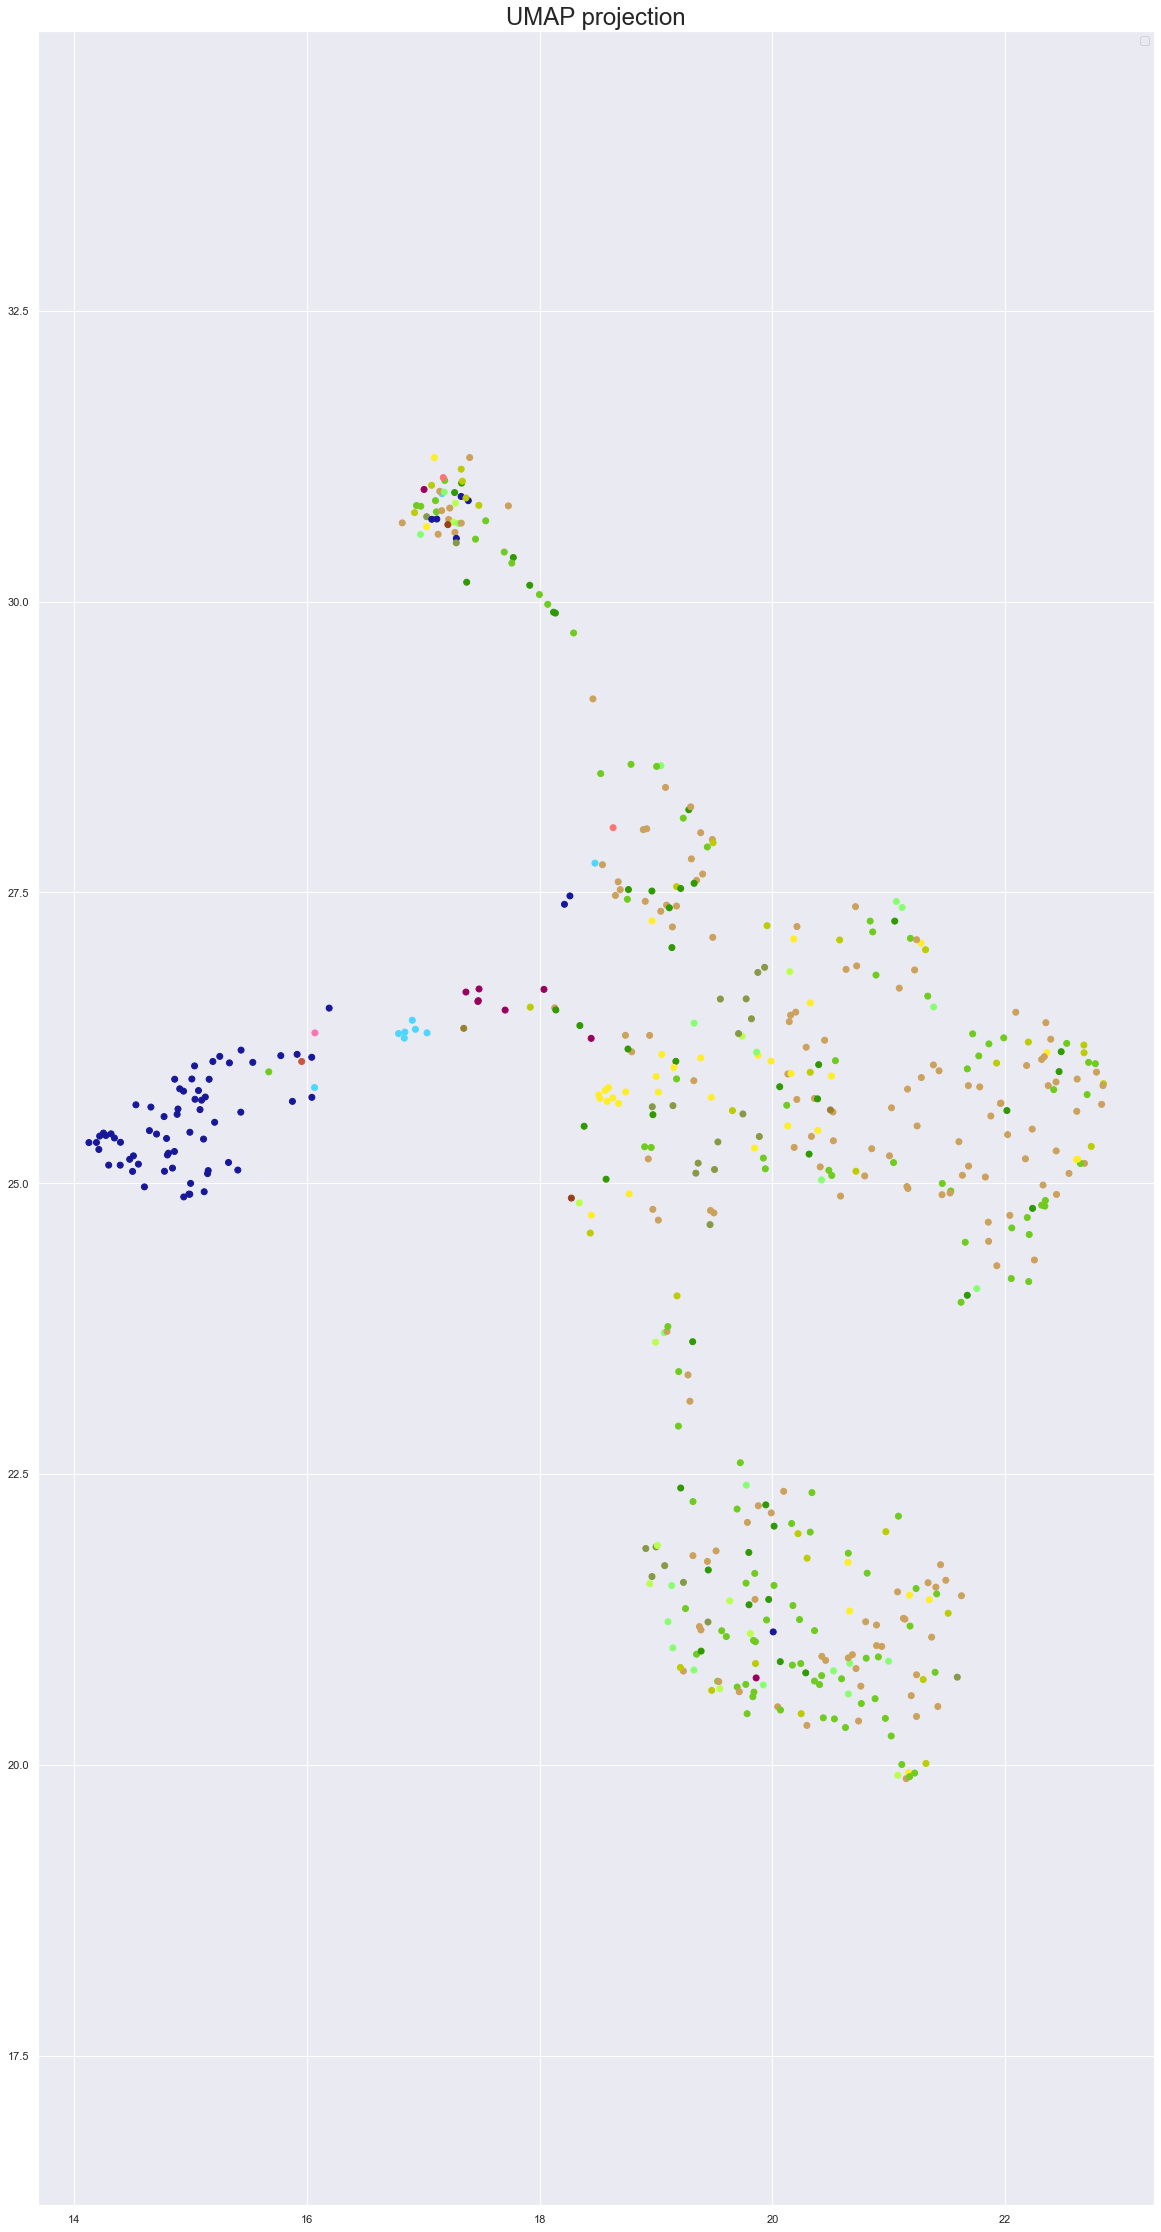

In [80]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

scatter = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=[sns.color_palette()[sc_dict[yy]] for yy in y]
    c = df_ephys_trans['level3.subclass_Tree_color'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)
plt.legend()



TypeError: cannot perform reduce with flexible type

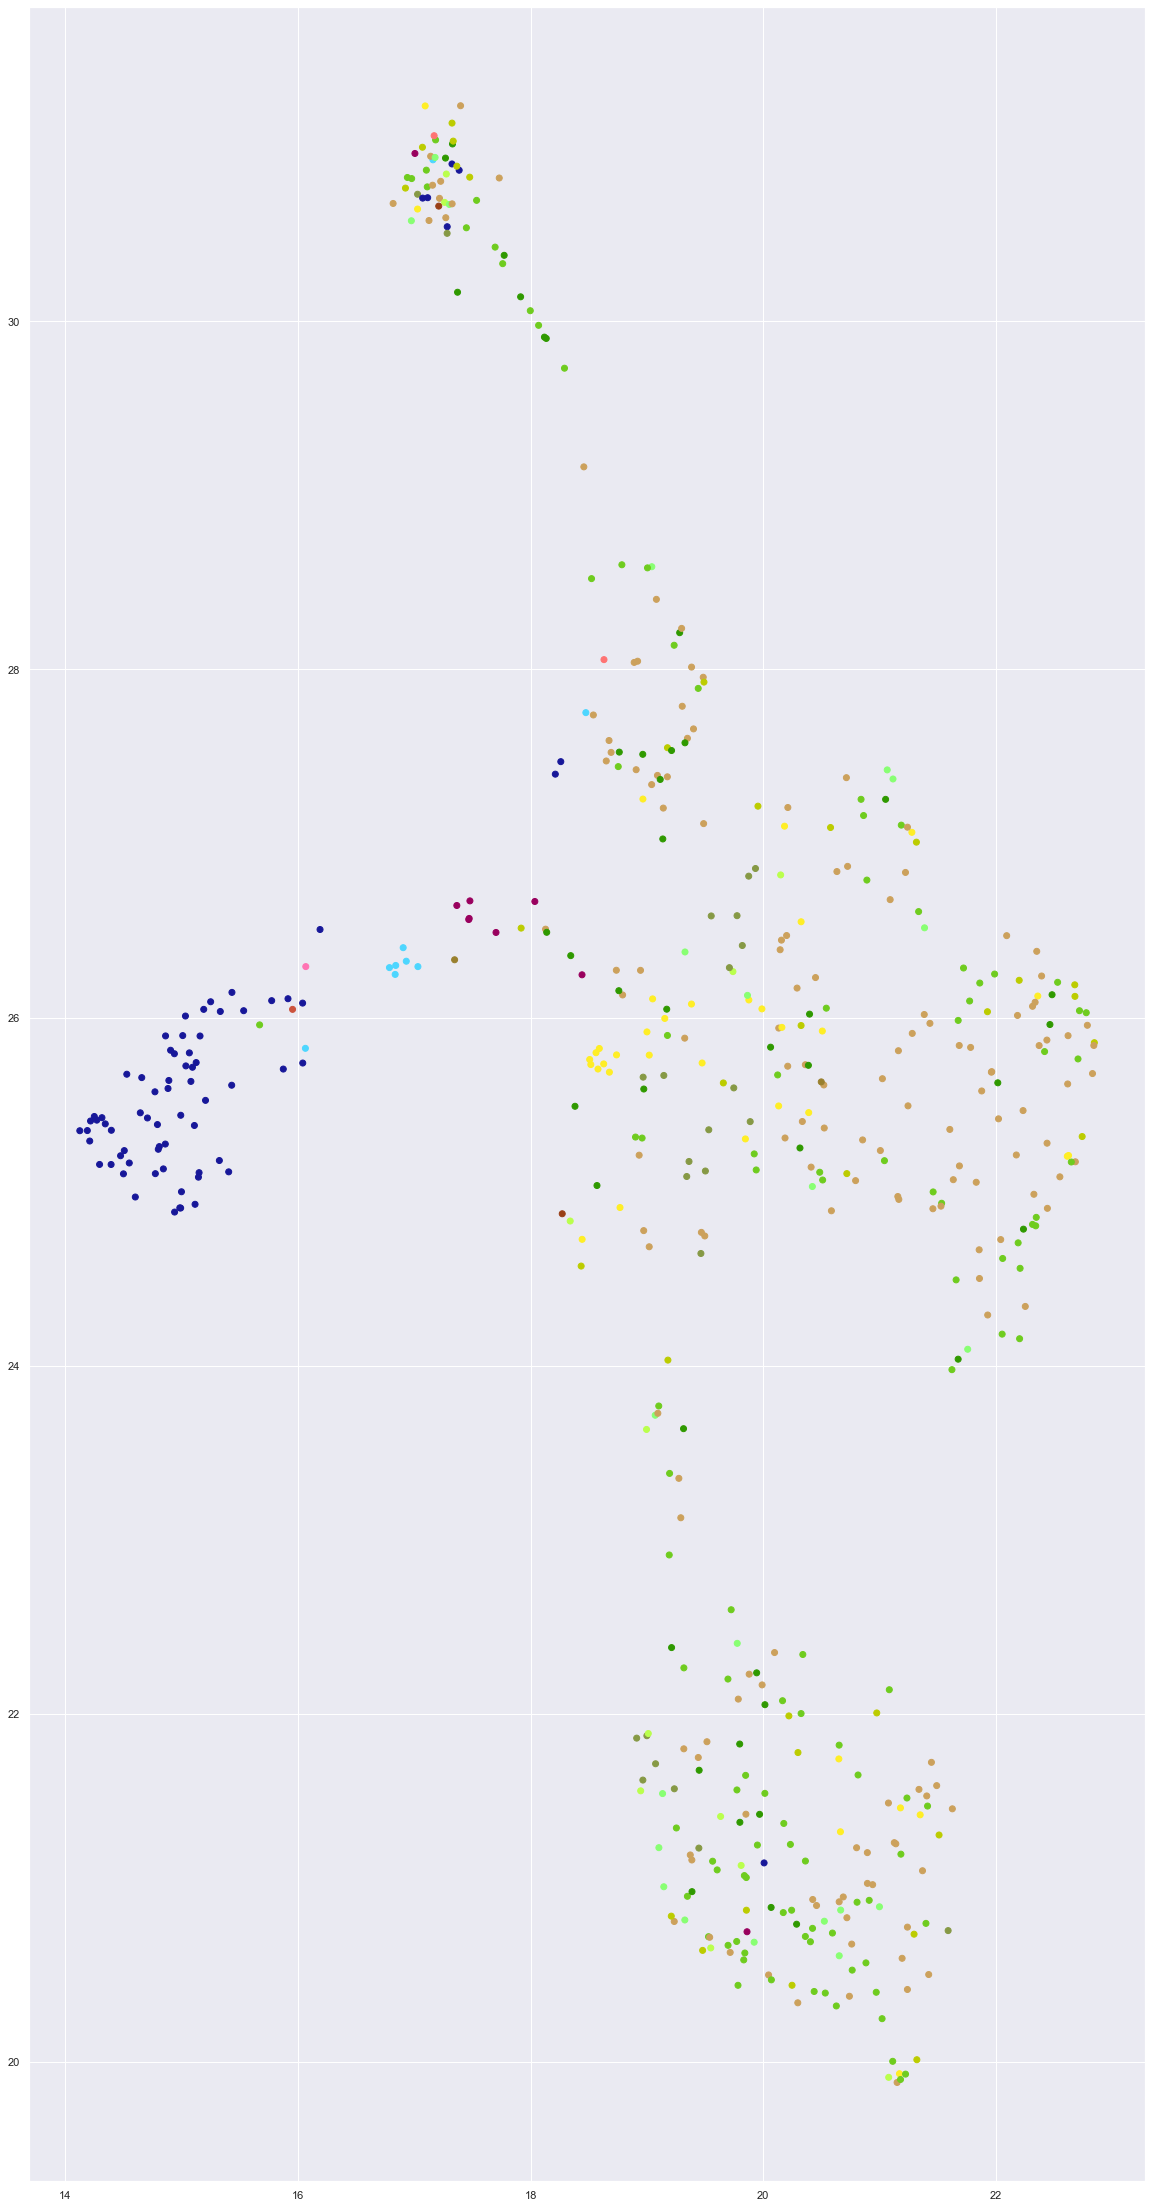

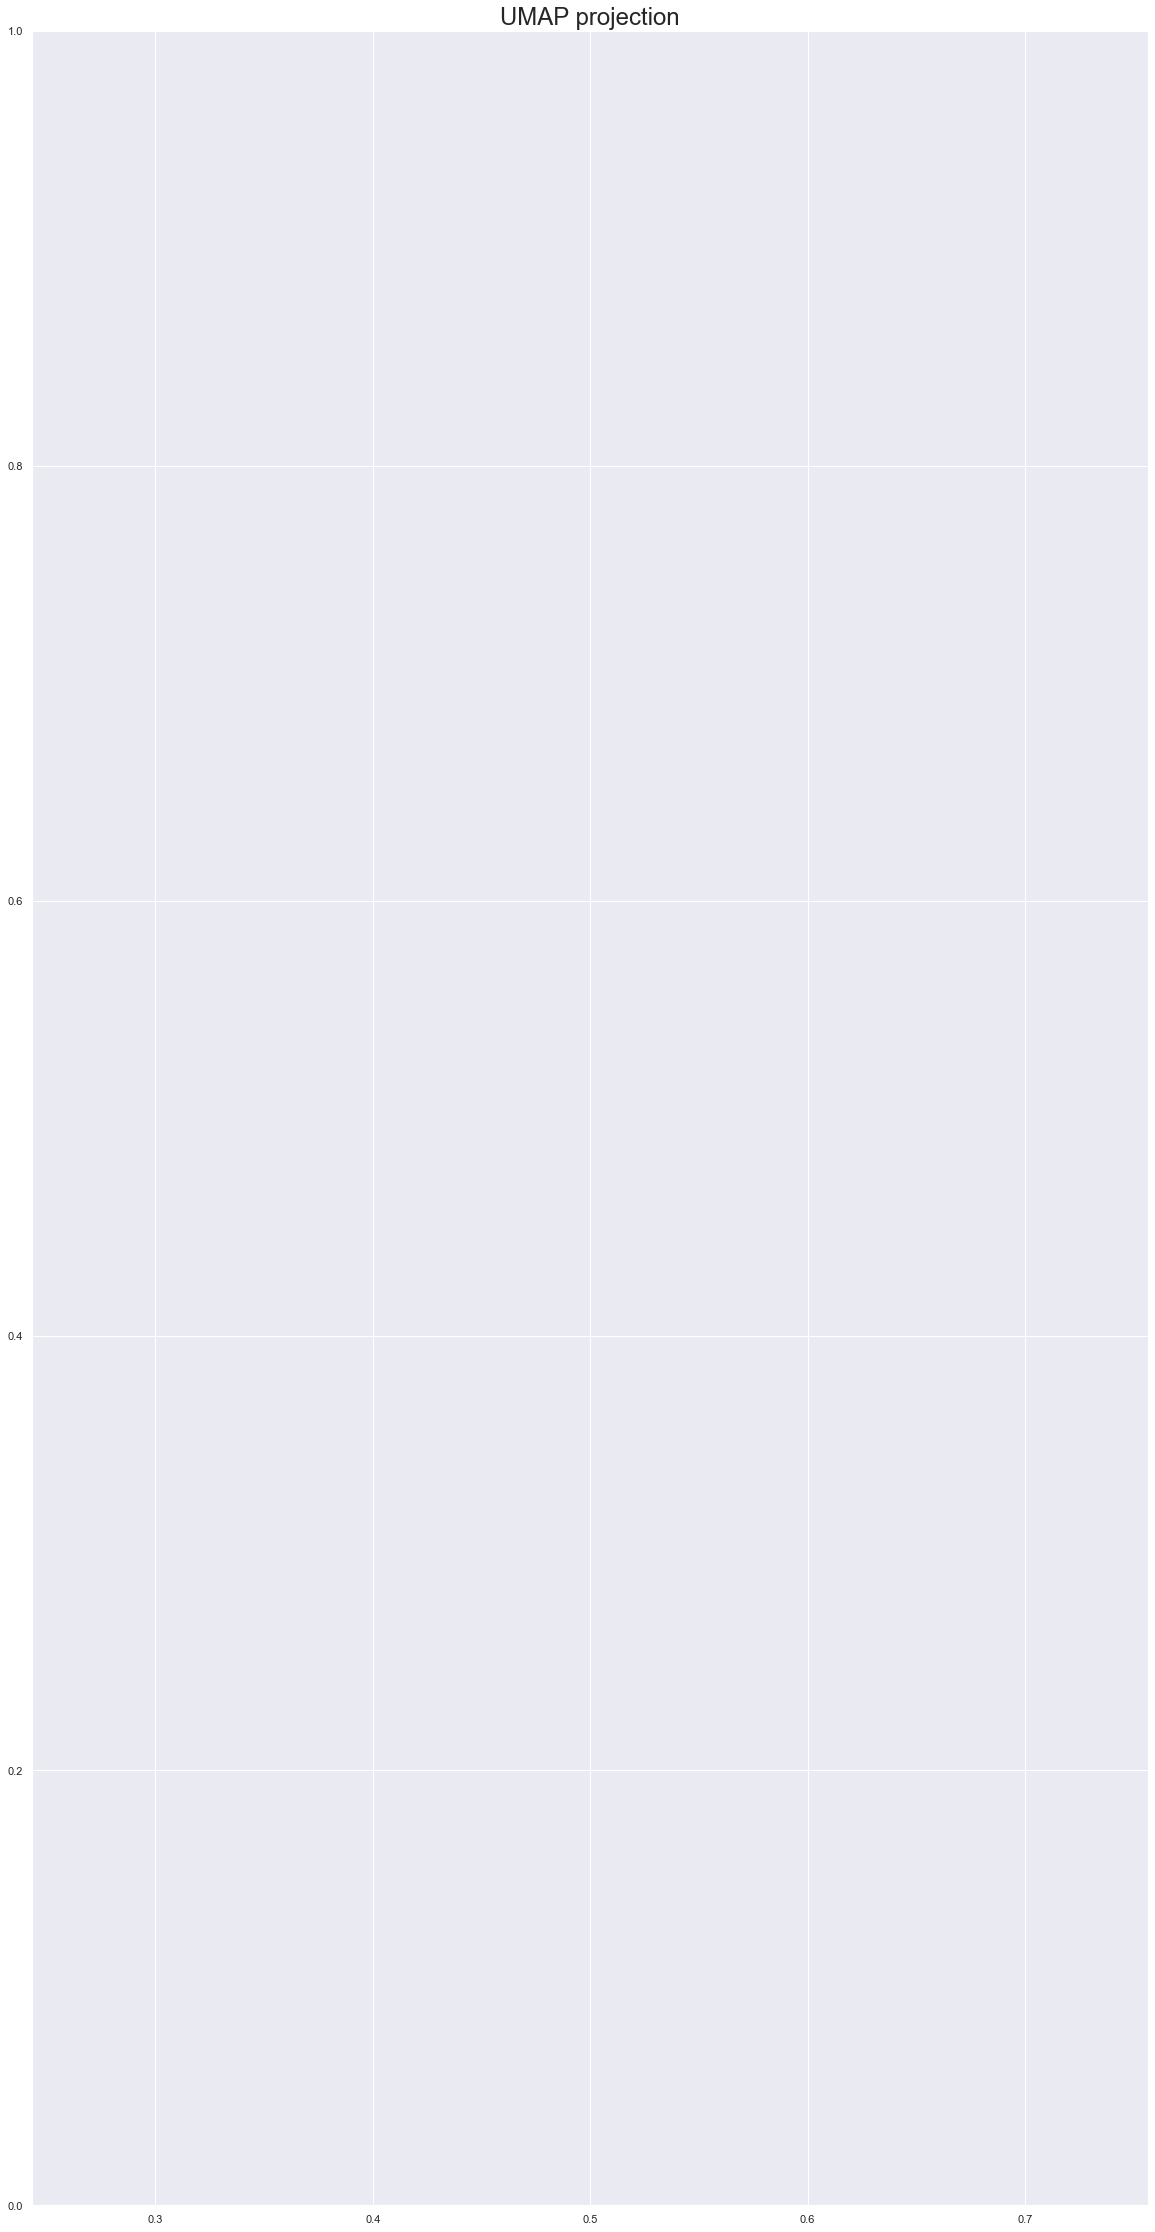

In [89]:
sc = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=[sns.color_palette()[sc_dict[yy]] for yy in y]
    c = df_ephys_trans['level3.subclass_Tree_color'])
fig, ax = plt.subplots()
ax.set_aspect('equal', 'datalim')
ax.set_title('UMAP projection', fontsize=24)
#plt.legend()

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label="Feature {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in df_ephys_trans['level3.subclass_Tree_color']]
plt.legend(handles=handles)



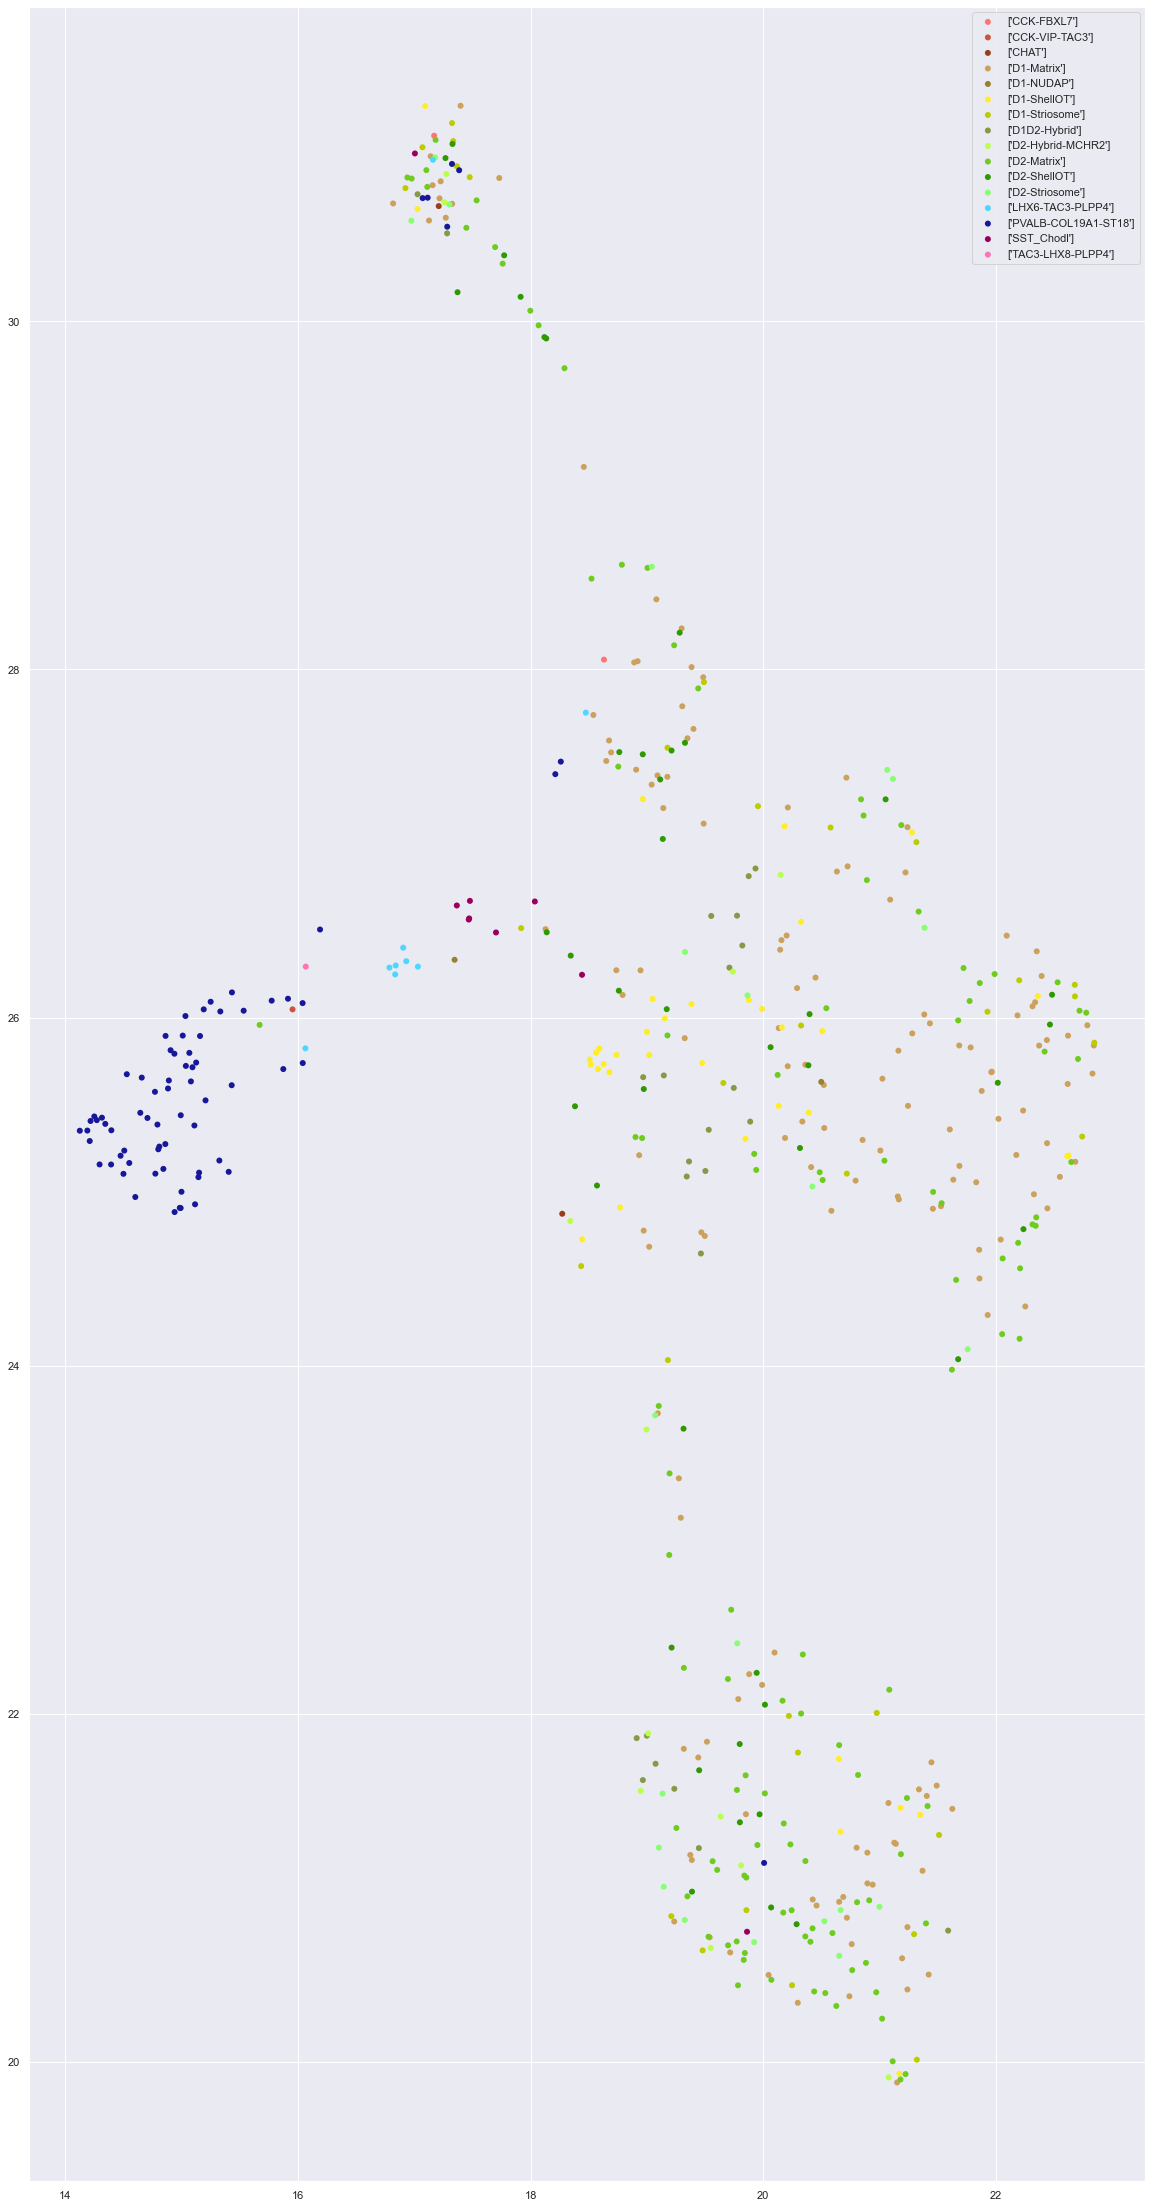

In [105]:
df = pd.DataFrame(df_ephys_trans['level3.subclass_Tree_color'])
df['level3.subclass_Tree_label'] = df_ephys_trans['level3.subclass_Tree_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

for i, dff in df.groupby("level3.subclass_Tree_label"):
    plt.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['level3.subclass_Tree_color']), 
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label']))

plt.legend()

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/794082062.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['level3.subclass_Tree_color']),


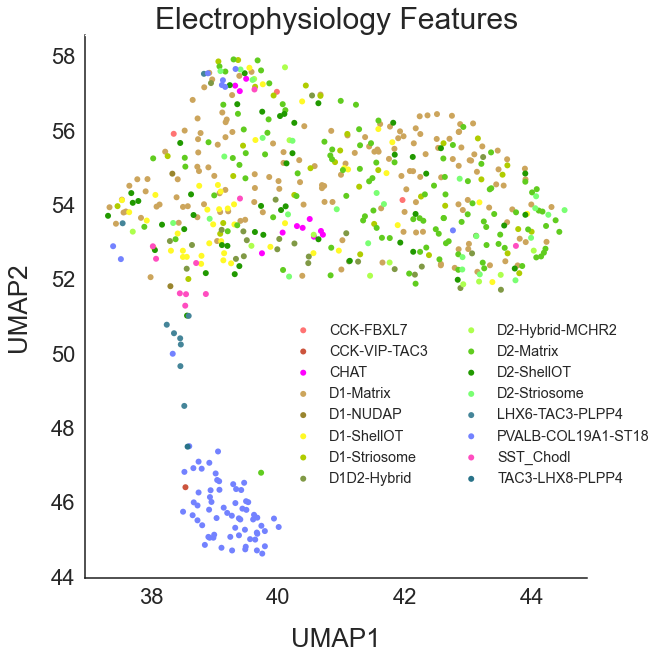

In [84]:
# Without chirp features

# Modify confusing colors

import umap

df_ephys_trans.loc[df_ephys_trans['level3.subclass_Tree_label']=='CHAT','level3.subclass_Tree_color'] = '#FF00FF'

df_ephys_trans.loc[df_ephys_trans['level3.subclass_Tree_label']=='TAC3-LHX8-PLPP4','level3.subclass_Tree_color'] = '#297389'

X_no_chirp = df_ephys_trans.iloc[:,594:677]

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X_no_chirp)  

scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

reducer = umap.UMAP(
        n_neighbors= 120,   # Default 15, 120 is looking good
        min_dist=0.4,  # Default 0.1, 0.4 is looking good
        #n_components=n_components,
        metric='manhattan',
        random_state = 42
    )
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

df = pd.DataFrame(df_ephys_trans['level3.subclass_Tree_color'])
df['level3.subclass_Tree_label'] = df_ephys_trans['level3.subclass_Tree_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

fig, ax = plt.subplots(figsize=(9, 10))

for i, dff in df.groupby("level3.subclass_Tree_label"):
    ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['level3.subclass_Tree_color']), 
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label'])[0], vmin=0, vmax=100)
ax.set_xlabel('UMAP1', fontsize = 26, labelpad=20)
ax.set_ylabel('UMAP2', fontsize = 26, labelpad =20)
ax.set_title('Electrophysiology Features', fontsize = 30)
plt.legend(ncol =2, fancybox=False, loc='center right', bbox_to_anchor=(1.15,0.32), fontsize='large', frameon=False)
ax.set_facecolor('white')
ax.spines['left'].set(linewidth=1.5, color='k')
ax.spines['bottom'].set(linewidth=1.5, color='k')
ax.tick_params(axis='both', which='major', labelsize=22)

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2943487704.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c = '#f76348',
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2943487704.py:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['level3.subclass_Tree_color']),
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2943487704.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c = 'k',
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_47064/2943487704.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(dff['UMAP1'], dff['UMAP2'], c = '#234713',


([], [])

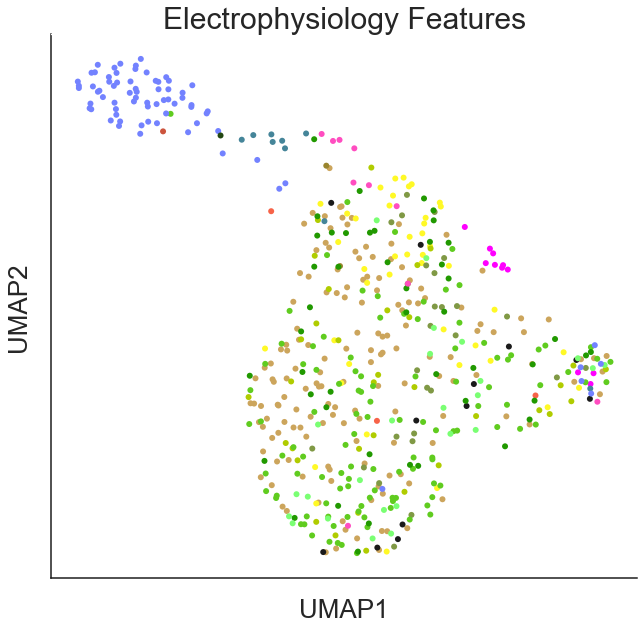

In [133]:
#np.std(X_std[:,3])


# Without chirp features

# Modify confusing colors

import umap

df_ephys_trans.loc[df_ephys_trans['level3.subclass_Tree_label']=='CHAT','level3.subclass_Tree_color'] = '#FF00FF'

df_ephys_trans.loc[df_ephys_trans['level3.subclass_Tree_label']=='TAC3-LHX8-PLPP4','level3.subclass_Tree_color'] = '#297389'

X_no_chirp = df_ephys_trans.iloc[:,594:677]

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X_no_chirp)  

scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

reducer = umap.UMAP(
    n_neighbors= 50,
    min_dist=0.4,
    metric='manhattan',
    random_state = 0
    )
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

df = pd.DataFrame(df_ephys_trans['level3.subclass_Tree_color'])
df['level3.subclass_Tree_label'] = df_ephys_trans['level3.subclass_Tree_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

fig, ax = plt.subplots(figsize=(10.5, 10))

for i, dff in df.groupby("level3.subclass_Tree_label"):
    if np.unique(dff['level3.subclass_Tree_label']) == 'TAC3-LHX8-PLPP4':
        ax.scatter(dff['UMAP1'], dff['UMAP2'], c = '#234713',
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label'])[0], vmin=0, vmax=100)
    elif np.unique(dff['level3.subclass_Tree_label']) == 'CCK-FBXL7':
        ax.scatter(dff['UMAP1'], dff['UMAP2'], c = '#f76348',
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label'])[0], vmin=0, vmax=100)
    elif np.unique(dff['level3.subclass_Tree_label']) == 'D2-Hybrid-MCHR2':
        ax.scatter(dff['UMAP1'], dff['UMAP2'], c = 'k',
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label'])[0], vmin=0, vmax=100)
    else:
        ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['level3.subclass_Tree_color']), 
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label'])[0], vmin=0, vmax=100)

ax.set_xlabel('UMAP1', fontsize = 26, labelpad=20)
ax.set_ylabel('UMAP2', fontsize = 26, labelpad =20)
ax.set_title('Electrophysiology Features', fontsize = 30)
#plt.legend(ncol =2, fancybox=False, loc='center right', bbox_to_anchor=(1.15,0.32), fontsize='large', frameon=False)
ax.set_facecolor('white')
ax.spines['left'].set(linewidth=1.5, color='k')
ax.spines['bottom'].set(linewidth=1.5, color='k')
ax.tick_params(axis='both', which='major', labelsize=22)
plt.xticks([])
plt.yticks([])

In [127]:
sum(df["level3.subclass_Tree_label"]== 'CCK-FBXL7')

3

In [ ]:
# MSN's only



In [153]:
df_ephys_trans['level3.subclass_Tree_color'][df_ephys_trans['level3.subclass_Tree_label']=='LHX6-TAC3-PLPP4']

7      #45C0E5
129    #45C0E5
149    #45C0E5
196    #45C0E5
240    #45C0E5
314    #45C0E5
350    #45C0E5
362    #45C0E5
397    #45C0E5
Name: level3.subclass_Tree_color, dtype: object

In [102]:
df.columns
#df.groupby("level3.subclass_Tree_label")

Index(['level3.subclass_Tree_color', 'leve3.subclass_Tree_label', 'UMAP1',
       'UMAP2'],
      dtype='object')

In [103]:
sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))
sc_dict['D2-Matrix']
[sc_dict[yy] for yy in y]
sns.color_palette()
sorted_id

range(0, 16)

In [216]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_ephys_trans['level3.subclass_Tree'].map({"D1-Matrix":0, "D2-Matrix":1, "D1-Striosome":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

TypeError: list indices must be integers or slices, not float

In [206]:
from logitboost import LogitBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Remove classes with less than three members - otherwise it throws an error, and makes more sense for crossvalidation split
counts = df_ephys_trans['level3.subclass_Tree'].value_counts()
sc_remove = counts.index[counts<3]
X = X_std[[sc not in sc_remove for sc in df_ephys_trans['level3.subclass_Tree']],:]   
y = y_orig[[sc not in sc_remove for sc in df_ephys_trans['level3.subclass_Tree']]]
print(X.shape)

test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=0)

lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print('Training\n%s' % report_train)
print('Test\n%s' % report_test)

(522, 92)


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Training accuracy: 0.9655
Test accuracy:     0.5000
Training
                    precision    recall  f1-score   support

         D1-Matrix       0.89      1.00      0.94        99
        D1-ShellOT       1.00      1.00      1.00        27
      D1-Striosome       1.00      0.95      0.98        21
       D1D2-Hybrid       1.00      0.94      0.97        16
   D2-Hybrid-MCHR2       1.00      1.00      1.00         8
         D2-Matrix       1.00      0.95      0.97        73
        D2-ShellOT       1.00      0.96      0.98        27
      D2-Striosome       1.00      0.89      0.94        18
   LHX6-TAC3-PLPP4       1.00      1.00      1.00         6
PVALB-COL19A1-ST18       1.00      0.94      0.97        47
         SST_Chodl       1.00      1.00      1.00         6

          accuracy                           0.97       348
         macro avg       0.99      0.97      0.98       348
      weighted avg       0.97      0.97      0.97       348

Test
                    precision  

Index(['CCK-FBXL7', 'D1-NUDAP', 'CHAT', 'TAC3-LHX8-PLPP4', 'CCK-VIP-TAC3'], dtype='object')

In [ ]:
# Try XGBoost

In [ ]:
# Only do crossvalidation on categories with more than 3 cells

# Hyperparameter tuning

percentage correst on train vs test
F1 score, F1 macro

In [42]:
round(0.005 * len(feat_vals))

3

In [52]:
df3_filt_sub['level3.subclass_Tree']

0             D2-Striosome
1                D2-Matrix
2                D1-Matrix
3                D2-Matrix
4                D2-Matrix
               ...        
1080             D2-Matrix
1081            D1-ShellOT
1209            D2-ShellOT
1211             D2-Matrix
1221    PVALB-COL19A1-ST18
Name: level3.subclass_Tree, Length: 527, dtype: object

In [55]:
a = [True, True]
b = [True, False]
a and b

[True, False]